In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings


In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('dengue_features_train.csv')
df_label = pd.read_csv('dengue_labels_train.csv')
data = pd.merge(df, df_label, on = ['city','year','weekofyear'], how = 'left')

In [4]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [6]:
data.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
sj_data = data[data['city'] == 'sj']


In [8]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    float64
 11  reanal

In [9]:
sj_data['ndvi_se'] = sj_data['ndvi_se'].fillna(method = 'ffill')
sj_data['ndvi_sw'] = sj_data['ndvi_sw'].fillna(method = 'ffill')
sj_data['ndvi_ne'] = sj_data['ndvi_ne'].fillna(method = 'ffill')
sj_data['ndvi_nw'] = sj_data['ndvi_nw'].fillna(method = 'ffill')

In [10]:
sj_data['reanalysis_air_temp_k'] = sj_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_avg_temp_k'] = sj_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_dew_point_temp_k'] =sj_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_max_air_temp_k'] = sj_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_min_air_temp_k'] = sj_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')

In [11]:
sj_data['reanalysis_precip_amt_kg_per_m2'] = sj_data['reanalysis_precip_amt_kg_per_m2'].fillna(method='ffill')
sj_data['reanalysis_relative_humidity_percent'] = sj_data['reanalysis_relative_humidity_percent'].fillna(method='ffill')
sj_data['reanalysis_sat_precip_amt_mm'] = sj_data['reanalysis_sat_precip_amt_mm'].fillna(method='ffill')
sj_data['reanalysis_tdtr_k'] = sj_data['reanalysis_tdtr_k'].fillna(method='ffill')
sj_data['station_avg_temp_c'] = sj_data['station_avg_temp_c'].fillna(method='ffill')
sj_data['station_diur_temp_rng_c'] = sj_data['station_diur_temp_rng_c'].fillna(method='ffill')
sj_data['station_precip_mm'] = sj_data['station_precip_mm'].fillna(method='ffill')

In [12]:
sj_data['avg_reanalysis'] = sj_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

In [13]:
sj_data['avg_ndvi'] = sj_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [14]:
sj_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,avg_reanalysis,avg_ndvi
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,296.686000,0.150606
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,297.581143,0.157479
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,298.178857,0.133315
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,298.385143,0.209286
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,298.880857,0.239235


In [15]:
sj_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

In [16]:
sj_data = sj_data[['week_start_date','total_cases','avg_reanalysis', 'avg_ndvi','reanalysis_relative_humidity_percent']]

In [17]:
sj_data.head()

,week_start_date,total_cases,avg_reanalysis,avg_ndvi,reanalysis_relative_humidity_percent
0,1990-04-30,4,296.686000,0.150606,73.365714
1,1990-05-07,5,297.581143,0.157479,77.368571
2,1990-05-14,4,298.178857,0.133315,82.052857
3,1990-05-21,3,298.385143,0.209286,80.337143
4,1990-05-28,6,298.880857,0.239235,80.460000


In [18]:
# !pip install Prophet

In [19]:
from prophet import Prophet

In [20]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   week_start_date                       936 non-null    object 
 1   total_cases                           936 non-null    int64  
 2   avg_reanalysis                        936 non-null    float64
 3   avg_ndvi                              936 non-null    float64
 4   reanalysis_relative_humidity_percent  936 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 43.9+ KB


In [21]:
sj_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [22]:
# m = prophet.Prophet()
# m.add_regressor('avg_reanalysis')
# m.add_regressor('avg_ndvi')
# m.fit(sj_data)

# # future = m.make_future_dataframe(periods = 10)
# # forecast = m.predict(future)




In [23]:
test_df_main = pd.read_csv('dengue_features_test.csv')
test_df = test_df_main[test_df_main['city']=='sj']
test_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [25]:
test_df['ndvi_se'] = test_df['ndvi_se'].fillna(method = 'ffill')
test_df['ndvi_sw'] = test_df['ndvi_sw'].fillna(method = 'ffill')
test_df['ndvi_ne'] = test_df['ndvi_ne'].fillna(method = 'ffill')
test_df['ndvi_nw'] = test_df['ndvi_nw'].fillna(method = 'ffill')

test_df['reanalysis_air_temp_k'] = test_df['reanalysis_air_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_avg_temp_k'] = test_df['reanalysis_avg_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_dew_point_temp_k'] =test_df['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_max_air_temp_k'] = test_df['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_min_air_temp_k'] = test_df['reanalysis_min_air_temp_k'].fillna(method = 'ffill')




test_df['avg_reanalysis'] = test_df[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

test_df['avg_ndvi'] = test_df[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [26]:
test_df = test_df[['week_start_date','avg_reanalysis', 'avg_ndvi','reanalysis_relative_humidity_percent']]

In [27]:
test_df['reanalysis_relative_humidity_percent'] = test_df['reanalysis_relative_humidity_percent'].fillna(method = 'ffill')


In [28]:
test_df.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df.head()


,ds,avg_reanalysis,avg_ndvi,reanalysis_relative_humidity_percent
0,2008-04-29,297.814000,0.039032,78.781429
1,2008-05-06,297.785714,0.030989,78.230000
2,2008-05-13,298.544286,0.057178,78.270000
3,2008-05-20,298.744286,0.057162,73.015714
4,2008-05-27,298.762286,0.058704,74.084286


In [29]:
# Set up parameter grid
import itertools
from prophet import Prophet
from prophet.diagnostics import cross_validation,performance_metrics
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('avg_ndvi')
    m.add_regressor('reanalysis_relative_humidity_percent')
    m.fit(sj_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='120 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model_sj = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model_sj.add_regressor('avg_reanalysis')
auto_model_sj.add_regressor('avg_ndvi')
auto_model_sj.add_regressor('reanalysis_relative_humidity_percent')
auto_model_sj.fit(sj_data)

18:42:40 - cmdstanpy - INFO - Chain [1] start processing
18:42:40 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
18:42:47 - cmdstanpy - INFO - Chain [1] start processing
18:42:47 - cmdstanpy - INFO - Chain [1] start processing
18:42:47 - cmdstanpy - INFO - Chain [1] start processing
18:42:47 - cmdstanpy - INFO - Chain [1] start processing
18:42:47 - cmdstanpy - INFO - Chain [1] start processing
18:42:47 - cmdstanpy - INFO - Chain [1] start processing
18:42:47 - cmdstanpy - INFO - Chain [1] start processing
18:42:47 - cmdstanpy - INFO - Chain [1] start processing
18:42:48 - cmdstanpy - INFO - Chain [1] done processing
18:42:48 - cmdstanpy - INFO - Chain [1] done processing
18:42:48 - cmdstanpy - INFO - Chain [1] done processing
18:42:48 - cmdstanpy - INFO - Chain [1] done processing
18:42:48 - cmdstanpy - INFO - Chain [1] done processing
18:42:48 - cmdstanpy - INFO - Chain [1] done pr

18:42:57 - cmdstanpy - INFO - Chain [1] done processing
18:42:57 - cmdstanpy - INFO - Chain [1] done processing
18:42:57 - cmdstanpy - INFO - Chain [1] done processing
18:42:58 - cmdstanpy - INFO - Chain [1] done processing
18:42:58 - cmdstanpy - INFO - Chain [1] start processing
18:42:58 - cmdstanpy - INFO - Chain [1] done processing
18:42:58 - cmdstanpy - INFO - Chain [1] done processing
18:42:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:42:58 - cmdstanpy - INFO - Chain [1] start processing
18:42:58 - cmdstanpy - INFO - Chain [1] done processing
18:42:58 - cmdstanpy - INFO - Chain [1] start processing
18:42:58 - cmdstanpy - INFO - Chain [1] start processing
18:42:58 - cmdstanpy - INFO - Chain [1] start processing
18:42:58 - cmdstanpy - INFO - Chain [1] done processing
18:42:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization termin

18:43:04 - cmdstanpy - INFO - Chain [1] done processing
18:43:05 - cmdstanpy - INFO - Chain [1] start processing
18:43:05 - cmdstanpy - INFO - Chain [1] done processing
18:43:05 - cmdstanpy - INFO - Chain [1] done processing
18:43:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:43:05 - cmdstanpy - INFO - Chain [1] start processing
18:43:05 - cmdstanpy - INFO - Chain [1] done processing
18:43:05 - cmdstanpy - INFO - Chain [1] start processing
18:43:05 - cmdstanpy - INFO - Chain [1] done processing
18:43:05 - cmdstanpy - INFO - Chain [1] done processing
18:43:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:43:05 - cmdstanpy - INFO - Chain [1] start processing
18:43:05 - cmdstanpy - INFO - Chain [1] done processing
18:43:05 - cmdstanpy - INFO - Chain [1] done processing
18:43:05 - cmdst

18:43:13 - cmdstanpy - INFO - Chain [1] start processing
18:43:13 - cmdstanpy - INFO - Chain [1] start processing
18:43:13 - cmdstanpy - INFO - Chain [1] done processing
18:43:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:43:13 - cmdstanpy - INFO - Chain [1] done processing
18:43:13 - cmdstanpy - INFO - Chain [1] start processing
18:43:13 - cmdstanpy - INFO - Chain [1] start processing
18:43:13 - cmdstanpy - INFO - Chain [1] start processing
18:43:13 - cmdstanpy - INFO - Chain [1] start processing
18:43:13 - cmdstanpy - INFO - Chain [1] done processing
18:43:13 - cmdstanpy - INFO - Chain [1] done processing
18:43:13 - cmdstanpy - INFO - Chain [1] done processing
18:43:13 - cmdstanpy - INFO - Chain [1] start processing
18:43:14 - cmdstanpy - INFO - Chain [1] start processing
18:43:14 - cmdstanpy - INFO - Chain [1] done processing
18:43:14 - cmdstanpy - INFO - Chain [1] done processin

18:43:22 - cmdstanpy - INFO - Chain [1] start processing
18:43:22 - cmdstanpy - INFO - Chain [1] start processing
18:43:22 - cmdstanpy - INFO - Chain [1] start processing
18:43:22 - cmdstanpy - INFO - Chain [1] start processing
18:43:22 - cmdstanpy - INFO - Chain [1] done processing
18:43:22 - cmdstanpy - INFO - Chain [1] done processing
18:43:22 - cmdstanpy - INFO - Chain [1] done processing
18:43:22 - cmdstanpy - INFO - Chain [1] start processing
18:43:22 - cmdstanpy - INFO - Chain [1] done processing
18:43:22 - cmdstanpy - INFO - Chain [1] done processing
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1] done processing
18:43:23 - cmdstanpy - INFO - Chain [1] done processing
18:43:23 - cmdstanpy - INFO - Chain [1] done processing
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1]

18:43:41 - cmdstanpy - INFO - Chain [1] start processing
18:43:41 - cmdstanpy - INFO - Chain [1] start processing
18:43:41 - cmdstanpy - INFO - Chain [1] done processing
18:43:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:43:41 - cmdstanpy - INFO - Chain [1] start processing
18:43:41 - cmdstanpy - INFO - Chain [1] done processing
18:43:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:43:41 - cmdstanpy - INFO - Chain [1] start processing
18:43:42 - cmdstanpy - INFO - Chain [1] done processing
18:43:42 - cmdstanpy - INFO - Chain [1] done processing
18:43:42 - cmdstanpy - INFO - Chain [1] done processing
18:43:42 - cmdstanpy - INFO - Chain [1] done processing
18:43:43 - cmdstanpy - INFO - Chain [1] done processing
18:43:43 - cmdstanpy - INFO - Chain [1] start processing
18:43:43 - cmds

18:43:48 - cmdstanpy - INFO - Chain [1] start processing
18:43:48 - cmdstanpy - INFO - Chain [1] start processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
18:43:48 - cmdstanpy - INFO - Chain [1] start processing
18:43:48 - cmdstanpy - INFO - Chain [1] start processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
18:43:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
Optimization terminated abnormally. Falling back to Newton.
18:43:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:43:48 - cmdst

18:43:54 - cmdstanpy - INFO - Chain [1] start processing
18:43:54 - cmdstanpy - INFO - Chain [1] done processing
18:43:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:43:54 - cmdstanpy - INFO - Chain [1] done processing
18:43:54 - cmdstanpy - INFO - Chain [1] start processing
18:43:54 - cmdstanpy - INFO - Chain [1] start processing
18:43:54 - cmdstanpy - INFO - Chain [1] done processing
18:43:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:43:54 - cmdstanpy - INFO - Chain [1] start processing
18:43:54 - cmdstanpy - INFO - Chain [1] done processing
18:43:54 - cmdstanpy - INFO - Chain [1] start processing
18:43:54 - cmdstanpy - INFO - Chain [1] done processing
18:43:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

18:44:04 - cmdstanpy - INFO - Chain [1] done processing
18:44:04 - cmdstanpy - INFO - Chain [1] done processing
18:44:04 - cmdstanpy - INFO - Chain [1] done processing
18:44:04 - cmdstanpy - INFO - Chain [1] start processing
18:44:04 - cmdstanpy - INFO - Chain [1] done processing
18:44:04 - cmdstanpy - INFO - Chain [1] start processing
18:44:04 - cmdstanpy - INFO - Chain [1] done processing
18:44:04 - cmdstanpy - INFO - Chain [1] done processing
18:44:04 - cmdstanpy - INFO - Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] done processing
18:44:05 - cmdstanpy - INFO - Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] done processing
18:44:05 - cmdstanpy - INFO - Chain [1] done processing
18:44:05 - cmdstanpy - INFO - Chain [1] done processing
18:44:05 - cmdstanpy - INFO - Chain [1] s

18:44:12 - cmdstanpy - INFO - Chain [1] start processing
18:44:12 - cmdstanpy - INFO - Chain [1] done processing
18:44:12 - cmdstanpy - INFO - Chain [1] start processing
18:44:12 - cmdstanpy - INFO - Chain [1] start processing
18:44:12 - cmdstanpy - INFO - Chain [1] done processing
18:44:12 - cmdstanpy - INFO - Chain [1] done processing
18:44:12 - cmdstanpy - INFO - Chain [1] done processing
18:44:12 - cmdstanpy - INFO - Chain [1] done processing
18:44:13 - cmdstanpy - INFO - Chain [1] start processing
18:44:13 - cmdstanpy - INFO - Chain [1] start processing
18:44:13 - cmdstanpy - INFO - Chain [1] done processing
18:44:13 - cmdstanpy - INFO - Chain [1] start processing
18:44:13 - cmdstanpy - INFO - Chain [1] start processing
18:44:13 - cmdstanpy - INFO - Chain [1] start processing
18:44:13 - cmdstanpy - INFO - Chain [1] done processing
18:44:13 - cmdstanpy - INFO - Chain [1] start processing
18:44:13 - cmdstanpy - INFO - Chain [1] done processing
18:44:13 - cmdstanpy - INFO - Chain [1]

18:44:36 - cmdstanpy - INFO - Chain [1] start processing
18:44:36 - cmdstanpy - INFO - Chain [1] done processing
18:44:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:44:36 - cmdstanpy - INFO - Chain [1] start processing
18:44:36 - cmdstanpy - INFO - Chain [1] done processing
18:44:36 - cmdstanpy - INFO - Chain [1] done processing
18:44:37 - cmdstanpy - INFO - Chain [1] done processing
18:44:37 - cmdstanpy - INFO - Chain [1] start processing
18:44:37 - cmdstanpy - INFO - Chain [1] done processing
18:44:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:44:37 - cmdstanpy - INFO - Chain [1] start processing
18:44:37 - cmdstanpy - INFO - Chain [1] start processing
18:44:37 - cmdstanpy - INFO - Chain [1] done processing
18:44:37 - cmdstanpy - INFO - Chain [1] done processing
18:44:37 - cmds

18:44:46 - cmdstanpy - INFO - Chain [1] done processing
18:44:47 - cmdstanpy - INFO - Chain [1] done processing
18:44:47 - cmdstanpy - INFO - Chain [1] done processing
18:44:47 - cmdstanpy - INFO - Chain [1] done processing
18:44:47 - cmdstanpy - INFO - Chain [1] start processing
18:44:47 - cmdstanpy - INFO - Chain [1] start processing
18:44:48 - cmdstanpy - INFO - Chain [1] done processing
18:44:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:44:48 - cmdstanpy - INFO - Chain [1] start processing
18:44:48 - cmdstanpy - INFO - Chain [1] done processing
18:44:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:44:48 - cmdstanpy - INFO - Chain [1] done processing
18:44:48 - cmdstanpy - INFO - Chain [1] start processing
18:44:48 - cmdstanpy - INFO - Chain [1] done processing
18:44:48 - cmdst

18:44:58 - cmdstanpy - INFO - Chain [1] start processing
18:44:58 - cmdstanpy - INFO - Chain [1] done processing
18:44:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:44:58 - cmdstanpy - INFO - Chain [1] start processing
18:44:58 - cmdstanpy - INFO - Chain [1] start processing
18:44:58 - cmdstanpy - INFO - Chain [1] done processing
18:44:58 - cmdstanpy - INFO - Chain [1] start processing
18:44:58 - cmdstanpy - INFO - Chain [1] done processing
18:44:58 - cmdstanpy - INFO - Chain [1] start processing
18:44:58 - cmdstanpy - INFO - Chain [1] done processing
18:44:58 - cmdstanpy - INFO - Chain [1] start processing
18:44:58 - cmdstanpy - INFO - Chain [1] start processing
18:44:58 - cmdstanpy - INFO - Chain [1] done processing
18:44:58 - cmdstanpy - INFO - Chain [1] done processing
18:44:59 - cmdstanpy - INFO - Chain [1] start processing
18:44:59 - cmdstanpy - INFO - Chain [1] done processin

18:45:08 - cmdstanpy - INFO - Chain [1] start processing
18:45:08 - cmdstanpy - INFO - Chain [1] start processing
18:45:08 - cmdstanpy - INFO - Chain [1] done processing
18:45:08 - cmdstanpy - INFO - Chain [1] done processing
18:45:08 - cmdstanpy - INFO - Chain [1] start processing
18:45:08 - cmdstanpy - INFO - Chain [1] start processing
18:45:08 - cmdstanpy - INFO - Chain [1] done processing
18:45:08 - cmdstanpy - INFO - Chain [1] start processing
18:45:08 - cmdstanpy - INFO - Chain [1] done processing
18:45:08 - cmdstanpy - INFO - Chain [1] start processing
18:45:08 - cmdstanpy - INFO - Chain [1] start processing
18:45:08 - cmdstanpy - INFO - Chain [1] done processing
18:45:08 - cmdstanpy - INFO - Chain [1] done processing
18:45:09 - cmdstanpy - INFO - Chain [1] done processing
18:45:09 - cmdstanpy - INFO - Chain [1] start processing
18:45:09 - cmdstanpy - INFO - Chain [1] start processing
18:45:09 - cmdstanpy - INFO - Chain [1] start processing
18:45:09 - cmdstanpy - INFO - Chain [1

18:45:19 - cmdstanpy - INFO - Chain [1] start processing
18:45:19 - cmdstanpy - INFO - Chain [1] start processing
18:45:19 - cmdstanpy - INFO - Chain [1] done processing
18:45:19 - cmdstanpy - INFO - Chain [1] start processing
18:45:19 - cmdstanpy - INFO - Chain [1] done processing
18:45:19 - cmdstanpy - INFO - Chain [1] done processing
18:45:19 - cmdstanpy - INFO - Chain [1] done processing
18:45:19 - cmdstanpy - INFO - Chain [1] done processing
18:45:19 - cmdstanpy - INFO - Chain [1] start processing
18:45:19 - cmdstanpy - INFO - Chain [1] start processing
18:45:19 - cmdstanpy - INFO - Chain [1] done processing
18:45:20 - cmdstanpy - INFO - Chain [1] done processing
18:45:21 - cmdstanpy - INFO - Chain [1] start processing
18:45:21 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
18:45:28 - cmdstanpy - INFO - Chain [1] start processing
18:45:28 - cmdstanpy - INFO - Chain [1] start pro

18:45:40 - cmdstanpy - INFO - Chain [1] start processing
18:45:40 - cmdstanpy - INFO - Chain [1] done processing
18:45:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:45:40 - cmdstanpy - INFO - Chain [1] start processing
18:45:40 - cmdstanpy - INFO - Chain [1] done processing
18:45:40 - cmdstanpy - INFO - Chain [1] done processing
18:45:40 - cmdstanpy - INFO - Chain [1] done processing
18:45:40 - cmdstanpy - INFO - Chain [1] done processing
18:45:40 - cmdstanpy - INFO - Chain [1] done processing
18:45:41 - cmdstanpy - INFO - Chain [1] start processing
18:45:41 - cmdstanpy - INFO - Chain [1] done processing
18:45:41 - cmdstanpy - INFO - Chain [1] done processing
18:45:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:45:41 - cmdstanpy - INFO - Chain [1] start processing
18:45:41 - cmdst

18:45:54 - cmdstanpy - INFO - Chain [1] start processing
18:45:54 - cmdstanpy - INFO - Chain [1] done processing
18:45:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:45:54 - cmdstanpy - INFO - Chain [1] start processing
18:45:55 - cmdstanpy - INFO - Chain [1] start processing
18:45:55 - cmdstanpy - INFO - Chain [1] done processing
18:45:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:45:55 - cmdstanpy - INFO - Chain [1] start processing
18:45:56 - cmdstanpy - INFO - Chain [1] done processing
18:45:57 - cmdstanpy - INFO - Chain [1] done processing
18:45:57 - cmdstanpy - INFO - Chain [1] start processing
18:45:57 - cmdstanpy - INFO - Chain [1] done processing
18:45:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

18:46:19 - cmdstanpy - INFO - Chain [1] done processing
18:46:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:46:20 - cmdstanpy - INFO - Chain [1] start processing
18:46:20 - cmdstanpy - INFO - Chain [1] start processing
18:46:20 - cmdstanpy - INFO - Chain [1] done processing
18:46:21 - cmdstanpy - INFO - Chain [1] start processing
18:46:21 - cmdstanpy - INFO - Chain [1] done processing
18:46:21 - cmdstanpy - INFO - Chain [1] start processing
18:46:21 - cmdstanpy - INFO - Chain [1] done processing
18:46:21 - cmdstanpy - INFO - Chain [1] start processing
18:46:22 - cmdstanpy - INFO - Chain [1] done processing
18:46:22 - cmdstanpy - INFO - Chain [1] start processing
18:46:22 - cmdstanpy - INFO - Chain [1] done processing
18:46:23 - cmdstanpy - INFO - Chain [1] start processing
18:46:23 - cmdstanpy - INFO - Chain [1] done processing
18:46:23 - cmdstanpy - ERROR - Chain [1] error: error d

18:46:48 - cmdstanpy - INFO - Chain [1] start processing
18:46:48 - cmdstanpy - INFO - Chain [1] start processing
18:46:48 - cmdstanpy - INFO - Chain [1] done processing
18:46:48 - cmdstanpy - INFO - Chain [1] done processing
18:46:48 - cmdstanpy - INFO - Chain [1] start processing
18:46:48 - cmdstanpy - INFO - Chain [1] start processing
18:46:48 - cmdstanpy - INFO - Chain [1] done processing
18:46:48 - cmdstanpy - INFO - Chain [1] done processing
18:46:48 - cmdstanpy - INFO - Chain [1] start processing
18:46:48 - cmdstanpy - INFO - Chain [1] done processing
18:46:49 - cmdstanpy - INFO - Chain [1] start processing
18:46:49 - cmdstanpy - INFO - Chain [1] done processing
18:46:49 - cmdstanpy - INFO - Chain [1] start processing
18:46:50 - cmdstanpy - INFO - Chain [1] done processing
18:46:50 - cmdstanpy - INFO - Chain [1] start processing
18:46:50 - cmdstanpy - INFO - Chain [1] start processing
18:46:50 - cmdstanpy - INFO - Chain [1] done processing
18:46:50 - cmdstanpy - INFO - Chain [1]

18:48:05 - cmdstanpy - INFO - Chain [1] done processing
18:48:05 - cmdstanpy - INFO - Chain [1] start processing
18:48:05 - cmdstanpy - INFO - Chain [1] done processing
18:48:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:05 - cmdstanpy - INFO - Chain [1] start processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:07 - cmdstanpy - INFO - Chain [1] done processing
18:48:07 - cmdstanpy - INFO - Chain [1] start processing
18:48:07 - cmdstanpy - INFO - Chain [1] done processing
18:48:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:07 - cmdsta

18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmd

18:48:25 - cmdstanpy - INFO - Chain [1] start processing
18:48:25 - cmdstanpy - INFO - Chain [1] start processing
18:48:25 - cmdstanpy - INFO - Chain [1] done processing
18:48:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:25 - cmdstanpy - INFO - Chain [1] done processing
18:48:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:25 - cmdstanpy - INFO - Chain [1] start processing
18:48:25 - cmdstanpy - INFO - Chain [1] start processing
18:48:25 - cmdstanpy - INFO - Chain [1] done processing
18:48:26 - cmdstanpy - INFO - Chain [1] start processing
18:48:26 - cmdstanpy - INFO - Chain [1] done processing
18:48:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:26 - cmdstanpy - INFO -

18:48:39 - cmdstanpy - INFO - Chain [1] start processing
18:48:39 - cmdstanpy - INFO - Chain [1] done processing
18:48:39 - cmdstanpy - INFO - Chain [1] start processing
18:48:39 - cmdstanpy - INFO - Chain [1] done processing
18:48:39 - cmdstanpy - INFO - Chain [1] start processing
18:48:39 - cmdstanpy - INFO - Chain [1] done processing
18:48:39 - cmdstanpy - INFO - Chain [1] done processing
18:48:39 - cmdstanpy - INFO - Chain [1] done processing
18:48:40 - cmdstanpy - INFO - Chain [1] start processing
18:48:40 - cmdstanpy - INFO - Chain [1] done processing
18:48:40 - cmdstanpy - INFO - Chain [1] start processing
18:48:40 - cmdstanpy - INFO - Chain [1] done processing
18:48:40 - cmdstanpy - INFO - Chain [1] start processing
18:48:40 - cmdstanpy - INFO - Chain [1] done processing
18:48:41 - cmdstanpy - INFO - Chain [1] start processing
18:48:41 - cmdstanpy - INFO - Chain [1] done processing
18:48:41 - cmdstanpy - INFO - Chain [1] start processing
18:48:41 - cmdstanpy - INFO - Chain [1] 

18:48:54 - cmdstanpy - INFO - Chain [1] done processing
18:48:54 - cmdstanpy - INFO - Chain [1] start processing
18:48:54 - cmdstanpy - INFO - Chain [1] done processing
18:48:54 - cmdstanpy - INFO - Chain [1] start processing
18:48:54 - cmdstanpy - INFO - Chain [1] done processing
18:48:54 - cmdstanpy - INFO - Chain [1] start processing
18:48:54 - cmdstanpy - INFO - Chain [1] done processing
18:48:54 - cmdstanpy - INFO - Chain [1] start processing
18:48:54 - cmdstanpy - INFO - Chain [1] done processing
18:48:55 - cmdstanpy - INFO - Chain [1] start processing
18:48:55 - cmdstanpy - INFO - Chain [1] done processing
18:48:55 - cmdstanpy - INFO - Chain [1] start processing
18:48:55 - cmdstanpy - INFO - Chain [1] start processing
18:48:55 - cmdstanpy - INFO - Chain [1] done processing
18:48:55 - cmdstanpy - INFO - Chain [1] done processing
18:48:55 - cmdstanpy - INFO - Chain [1] start processing
18:48:55 - cmdstanpy - INFO - Chain [1] done processing
18:48:55 - cmdstanpy - INFO - Chain [1] 

18:49:19 - cmdstanpy - INFO - Chain [1] start processing
18:49:19 - cmdstanpy - INFO - Chain [1] done processing
18:49:19 - cmdstanpy - INFO - Chain [1] start processing
18:49:19 - cmdstanpy - INFO - Chain [1] done processing
18:49:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:49:19 - cmdstanpy - INFO - Chain [1] start processing
18:49:20 - cmdstanpy - INFO - Chain [1] done processing
18:49:20 - cmdstanpy - INFO - Chain [1] start processing
18:49:20 - cmdstanpy - INFO - Chain [1] start processing
18:49:20 - cmdstanpy - INFO - Chain [1] done processing
18:49:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
18:49:20 - cmdstanpy - INFO - Chain [1] done processing
18:49:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormall

18:49:26 - cmdstanpy - INFO - Chain [1] done processing
18:49:26 - cmdstanpy - INFO - Chain [1] start processing
18:49:26 - cmdstanpy - INFO - Chain [1] done processing
18:49:27 - cmdstanpy - INFO - Chain [1] start processing
18:49:27 - cmdstanpy - INFO - Chain [1] done processing
18:49:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:49:27 - cmdstanpy - INFO - Chain [1] start processing
18:49:27 - cmdstanpy - INFO - Chain [1] done processing
18:49:27 - cmdstanpy - INFO - Chain [1] done processing
18:49:28 - cmdstanpy - INFO - Chain [1] start processing
18:49:28 - cmdstanpy - INFO - Chain [1] done processing
18:49:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:49:28 - cmdstanpy - INFO - Chain [1] start processing
18:49:28 - cmdstanpy - INFO - Chain [1] done processing
18:49:28 - cmds

18:49:39 - cmdstanpy - INFO - Chain [1] start processing
18:49:40 - cmdstanpy - INFO - Chain [1] done processing
18:49:40 - cmdstanpy - INFO - Chain [1] done processing
18:49:40 - cmdstanpy - INFO - Chain [1] start processing
18:49:40 - cmdstanpy - INFO - Chain [1] done processing
18:49:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:49:40 - cmdstanpy - INFO - Chain [1] start processing
18:49:40 - cmdstanpy - INFO - Chain [1] done processing
18:49:40 - cmdstanpy - INFO - Chain [1] start processing
18:49:40 - cmdstanpy - INFO - Chain [1] done processing
18:49:40 - cmdstanpy - INFO - Chain [1] start processing
18:49:40 - cmdstanpy - INFO - Chain [1] done processing
18:49:40 - cmdstanpy - INFO - Chain [1] start processing
18:49:41 - cmdstanpy - INFO - Chain [1] start processing
18:49:41 - cmdstanpy - INFO - Chain [1] done processing
18:49:41 - cmdstanpy - INFO - Chain [1] done processing

18:49:53 - cmdstanpy - INFO - Chain [1] start processing
18:49:53 - cmdstanpy - INFO - Chain [1] start processing
18:49:53 - cmdstanpy - INFO - Chain [1] start processing
18:49:53 - cmdstanpy - INFO - Chain [1] done processing
18:49:53 - cmdstanpy - INFO - Chain [1] done processing
18:49:53 - cmdstanpy - INFO - Chain [1] done processing
18:49:53 - cmdstanpy - INFO - Chain [1] start processing
18:49:53 - cmdstanpy - INFO - Chain [1] done processing
18:49:53 - cmdstanpy - INFO - Chain [1] start processing
18:49:53 - cmdstanpy - INFO - Chain [1] start processing
18:49:54 - cmdstanpy - INFO - Chain [1] start processing
18:49:54 - cmdstanpy - INFO - Chain [1] done processing
18:49:54 - cmdstanpy - INFO - Chain [1] done processing
18:49:54 - cmdstanpy - INFO - Chain [1] done processing
18:49:54 - cmdstanpy - INFO - Chain [1] start processing
18:49:54 - cmdstanpy - INFO - Chain [1] start processing
18:49:54 - cmdstanpy - INFO - Chain [1] start processing
18:49:55 - cmdstanpy - INFO - Chain [1

18:50:09 - cmdstanpy - INFO - Chain [1] start processing
18:50:09 - cmdstanpy - INFO - Chain [1] start processing
18:50:10 - cmdstanpy - INFO - Chain [1] done processing
18:50:10 - cmdstanpy - INFO - Chain [1] done processing
18:50:10 - cmdstanpy - INFO - Chain [1] start processing
18:50:10 - cmdstanpy - INFO - Chain [1] start processing
18:50:10 - cmdstanpy - INFO - Chain [1] done processing
18:50:10 - cmdstanpy - INFO - Chain [1] done processing
18:50:10 - cmdstanpy - INFO - Chain [1] start processing
18:50:10 - cmdstanpy - INFO - Chain [1] done processing
18:50:11 - cmdstanpy - INFO - Chain [1] start processing
18:50:11 - cmdstanpy - INFO - Chain [1] start processing
18:50:11 - cmdstanpy - INFO - Chain [1] start processing
18:50:11 - cmdstanpy - INFO - Chain [1] done processing
18:50:11 - cmdstanpy - INFO - Chain [1] done processing
18:50:11 - cmdstanpy - INFO - Chain [1] done processing
18:50:12 - cmdstanpy - INFO - Chain [1] done processing
18:50:13 - cmdstanpy - INFO - Chain [1] 

18:50:29 - cmdstanpy - INFO - Chain [1] start processing
18:50:29 - cmdstanpy - INFO - Chain [1] done processing
18:50:29 - cmdstanpy - INFO - Chain [1] start processing
18:50:29 - cmdstanpy - INFO - Chain [1] done processing
18:50:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:50:29 - cmdstanpy - INFO - Chain [1] start processing
18:50:30 - cmdstanpy - INFO - Chain [1] done processing
18:50:30 - cmdstanpy - INFO - Chain [1] start processing
18:50:30 - cmdstanpy - INFO - Chain [1] done processing
18:50:30 - cmdstanpy - INFO - Chain [1] done processing
18:50:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:50:30 - cmdstanpy - INFO - Chain [1] start processing
18:50:30 - cmdstanpy - INFO - Chain [1] done processing
18:50:30 - cmdstanpy - INFO - Chain [1] start processing
18:50:30 - cmd

18:50:36 - cmdstanpy - INFO - Chain [1] done processing
18:50:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:50:36 - cmdstanpy - INFO - Chain [1] start processing
18:50:36 - cmdstanpy - INFO - Chain [1] start processing
18:50:36 - cmdstanpy - INFO - Chain [1] done processing
18:50:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:50:36 - cmdstanpy - INFO - Chain [1] start processing
18:50:37 - cmdstanpy - INFO - Chain [1] done processing
18:50:37 - cmdstanpy - INFO - Chain [1] done processing
18:50:37 - cmdstanpy - INFO - Chain [1] start processing
18:50:37 - cmdstanpy - INFO - Chain [1] done processing
18:50:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:50:37 - cmdstanpy - INFO - 

18:50:47 - cmdstanpy - INFO - Chain [1] done processing
18:50:47 - cmdstanpy - INFO - Chain [1] start processing
18:50:47 - cmdstanpy - INFO - Chain [1] done processing
18:50:47 - cmdstanpy - INFO - Chain [1] done processing
18:50:47 - cmdstanpy - INFO - Chain [1] start processing
18:50:47 - cmdstanpy - INFO - Chain [1] start processing
18:50:47 - cmdstanpy - INFO - Chain [1] done processing
18:50:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:50:47 - cmdstanpy - INFO - Chain [1] done processing
18:50:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:50:47 - cmdstanpy - INFO - Chain [1] start processing
18:50:47 - cmdstanpy - INFO - Chain [1] start processing
18:50:47 - cmdstanpy - INFO - Chain [1] start processing
18:50:47 - cmdstanpy - INFO - Chain [1] done processing
18:50:47 - cmd

18:50:59 - cmdstanpy - INFO - Chain [1] start processing
18:50:59 - cmdstanpy - INFO - Chain [1] done processing
18:50:59 - cmdstanpy - INFO - Chain [1] start processing
18:50:59 - cmdstanpy - INFO - Chain [1] start processing
18:50:59 - cmdstanpy - INFO - Chain [1] done processing
18:50:59 - cmdstanpy - INFO - Chain [1] done processing
18:50:59 - cmdstanpy - INFO - Chain [1] start processing
18:50:59 - cmdstanpy - INFO - Chain [1] done processing
18:50:59 - cmdstanpy - INFO - Chain [1] start processing
18:50:59 - cmdstanpy - INFO - Chain [1] done processing
18:51:00 - cmdstanpy - INFO - Chain [1] start processing
18:51:00 - cmdstanpy - INFO - Chain [1] start processing
18:51:00 - cmdstanpy - INFO - Chain [1] start processing
18:51:00 - cmdstanpy - INFO - Chain [1] done processing
18:51:00 - cmdstanpy - INFO - Chain [1] start processing
18:51:00 - cmdstanpy - INFO - Chain [1] done processing
18:51:00 - cmdstanpy - INFO - Chain [1] done processing
18:51:00 - cmdstanpy - INFO - Chain [1]

18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:30 - cmdstanpy - INFO - Chain [1] done processing
18:51:31 - cmdstanpy - INFO - Chain [1] done processing
18:51:31 - cmdstanpy - INFO - Chain [1] start processing
18:51:32 - cmdstanpy - INFO - Chain [1] start processing
18:51:32 - cmdstanpy - INFO - Chain [1] done processing
18:51:33 - cmdstanpy - INFO - Chain [1] done processing
18:51:33 - cmdstanpy - INFO - Chain [1] done processing
18:51:33 - cmdstanpy - INFO - Chain [1] start processing
18:51:33 - cmdstanpy - INFO - Chain [1] start processing
18:51:33 - cmdstanpy - INFO - Chain [1] start processing
18:51:34 - cmdstanpy - INFO - Chain [1] done processing
18:51:34 - cmdstanpy - INFO - Chain [1] done processing
18:51:34 - cmdstanpy - INFO - Chain [1] done processing
18:51:34 - cmdstanpy - INFO - Chain [1] start processing
18:51:34 - cmdstanpy - INFO - Chain [1] done processing
18:51:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Opt

18:51:41 - cmdstanpy - INFO - Chain [1] done processing
18:51:41 - cmdstanpy - INFO - Chain [1] start processing
18:51:41 - cmdstanpy - INFO - Chain [1] done processing
18:51:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:51:41 - cmdstanpy - INFO - Chain [1] start processing
18:51:41 - cmdstanpy - INFO - Chain [1] done processing
18:51:41 - cmdstanpy - INFO - Chain [1] done processing
18:51:41 - cmdstanpy - INFO - Chain [1] start processing
18:51:41 - cmdstanpy - INFO - Chain [1] done processing
18:51:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:51:41 - cmdstanpy - INFO - Chain [1] start processing
18:51:41 - cmdstanpy - INFO - Chain [1] start processing
18:51:41 - cmdstanpy - INFO - Chain [1] start processing
18:51:41 - cmdstanpy - INFO - Chain [1] done processing
18:51:41 - cmd

18:51:45 - cmdstanpy - INFO - Chain [1] start processing
18:51:45 - cmdstanpy - INFO - Chain [1] done processing
18:51:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:51:45 - cmdstanpy - INFO - Chain [1] start processing
18:51:45 - cmdstanpy - INFO - Chain [1] done processing
18:51:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:51:45 - cmdstanpy - INFO - Chain [1] done processing
18:51:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:51:46 - cmdstanpy - INFO - Chain [1] start processing
18:51:46 - cmdstanpy - INFO - Chain [1] start processing
18:51:46 - cmdstanpy - INFO - Chain [1] done processing
18:51:46 - cmdstanpy - INFO - Chain [1] done processing
18:51:46 - cmdstanpy - INFO - 

18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] start processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] start processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] start processing
18:51:52 - cmdstanpy - INFO - Chain [1] start processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] start processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] start processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] done processing
18:51:52 - cmdstanpy - INFO - Chain [1] start processing
18:51:52 - cmdstanpy - INFO - Chain [1] d

18:52:04 - cmdstanpy - INFO - Chain [1] done processing
18:52:04 - cmdstanpy - INFO - Chain [1] done processing
18:52:04 - cmdstanpy - INFO - Chain [1] start processing
18:52:04 - cmdstanpy - INFO - Chain [1] done processing
18:52:04 - cmdstanpy - INFO - Chain [1] start processing
18:52:04 - cmdstanpy - INFO - Chain [1] done processing
18:52:05 - cmdstanpy - INFO - Chain [1] start processing
18:52:05 - cmdstanpy - INFO - Chain [1] start processing
18:52:05 - cmdstanpy - INFO - Chain [1] done processing
18:52:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:52:05 - cmdstanpy - INFO - Chain [1] start processing
18:52:05 - cmdstanpy - INFO - Chain [1] done processing
18:52:05 - cmdstanpy - INFO - Chain [1] start processing
18:52:05 - cmdstanpy - INFO - Chain [1] done processing
18:52:05 - cmdstanpy - INFO - Chain [1] start processing
18:52:05 - cmdstanpy - INFO - Chain [1] done processing

18:52:29 - cmdstanpy - INFO - Chain [1] start processing
18:52:29 - cmdstanpy - INFO - Chain [1] start processing
18:52:29 - cmdstanpy - INFO - Chain [1] done processing
18:52:29 - cmdstanpy - INFO - Chain [1] done processing
18:52:30 - cmdstanpy - INFO - Chain [1] start processing
18:52:30 - cmdstanpy - INFO - Chain [1] done processing
18:52:30 - cmdstanpy - INFO - Chain [1] start processing
18:52:30 - cmdstanpy - INFO - Chain [1] start processing
18:52:30 - cmdstanpy - INFO - Chain [1] done processing
18:52:30 - cmdstanpy - INFO - Chain [1] done processing
18:52:30 - cmdstanpy - INFO - Chain [1] start processing
18:52:30 - cmdstanpy - INFO - Chain [1] start processing
18:52:30 - cmdstanpy - INFO - Chain [1] done processing
18:52:30 - cmdstanpy - INFO - Chain [1] done processing
18:52:30 - cmdstanpy - INFO - Chain [1] start processing
18:52:30 - cmdstanpy - INFO - Chain [1] start processing
18:52:30 - cmdstanpy - INFO - Chain [1] done processing
18:52:30 - cmdstanpy - INFO - Chain [1]

18:52:42 - cmdstanpy - INFO - Chain [1] start processing
18:52:42 - cmdstanpy - INFO - Chain [1] done processing
18:52:42 - cmdstanpy - INFO - Chain [1] done processing
18:52:43 - cmdstanpy - INFO - Chain [1] start processing
18:52:43 - cmdstanpy - INFO - Chain [1] done processing
18:52:43 - cmdstanpy - INFO - Chain [1] start processing
18:52:43 - cmdstanpy - INFO - Chain [1] start processing
18:52:43 - cmdstanpy - INFO - Chain [1] start processing
18:52:43 - cmdstanpy - INFO - Chain [1] start processing
18:52:43 - cmdstanpy - INFO - Chain [1] done processing
18:52:43 - cmdstanpy - INFO - Chain [1] done processing
18:52:43 - cmdstanpy - INFO - Chain [1] done processing
18:52:43 - cmdstanpy - INFO - Chain [1] done processing
18:52:44 - cmdstanpy - INFO - Chain [1] start processing
18:52:44 - cmdstanpy - INFO - Chain [1] start processing
18:52:44 - cmdstanpy - INFO - Chain [1] done processing
18:52:44 - cmdstanpy - INFO - Chain [1] done processing
18:52:44 - cmdstanpy - INFO - Chain [1] 

18:52:59 - cmdstanpy - INFO - Chain [1] done processing
18:52:59 - cmdstanpy - INFO - Chain [1] start processing
18:52:59 - cmdstanpy - INFO - Chain [1] start processing
18:52:59 - cmdstanpy - INFO - Chain [1] start processing
18:52:59 - cmdstanpy - INFO - Chain [1] done processing
18:52:59 - cmdstanpy - INFO - Chain [1] done processing
18:52:59 - cmdstanpy - INFO - Chain [1] done processing
18:52:59 - cmdstanpy - INFO - Chain [1] start processing
18:52:59 - cmdstanpy - INFO - Chain [1] done processing
18:52:59 - cmdstanpy - INFO - Chain [1] done processing
18:53:00 - cmdstanpy - INFO - Chain [1] start processing
18:53:00 - cmdstanpy - INFO - Chain [1] start processing
18:53:00 - cmdstanpy - INFO - Chain [1] start processing
18:53:00 - cmdstanpy - INFO - Chain [1] start processing
18:53:00 - cmdstanpy - INFO - Chain [1] done processing
18:53:00 - cmdstanpy - INFO - Chain [1] done processing
18:53:00 - cmdstanpy - INFO - Chain [1] done processing
18:53:00 - cmdstanpy - INFO - Chain [1] 

18:53:23 - cmdstanpy - INFO - Chain [1] done processing
18:53:23 - cmdstanpy - INFO - Chain [1] start processing
18:53:23 - cmdstanpy - INFO - Chain [1] done processing
18:53:23 - cmdstanpy - INFO - Chain [1] start processing
18:53:24 - cmdstanpy - INFO - Chain [1] done processing
18:53:24 - cmdstanpy - INFO - Chain [1] start processing
18:53:24 - cmdstanpy - INFO - Chain [1] start processing
18:53:24 - cmdstanpy - INFO - Chain [1] start processing
18:53:24 - cmdstanpy - INFO - Chain [1] done processing
18:53:24 - cmdstanpy - INFO - Chain [1] done processing
18:53:24 - cmdstanpy - INFO - Chain [1] done processing
18:53:24 - cmdstanpy - INFO - Chain [1] start processing
18:53:24 - cmdstanpy - INFO - Chain [1] done processing
18:53:24 - cmdstanpy - INFO - Chain [1] start processing
18:53:24 - cmdstanpy - INFO - Chain [1] done processing
18:53:24 - cmdstanpy - INFO - Chain [1] start processing
18:53:24 - cmdstanpy - INFO - Chain [1] start processing
18:53:24 - cmdstanpy - INFO - Chain [1]

18:53:36 - cmdstanpy - INFO - Chain [1] start processing
18:53:36 - cmdstanpy - INFO - Chain [1] done processing
18:53:36 - cmdstanpy - INFO - Chain [1] start processing
18:53:36 - cmdstanpy - INFO - Chain [1] start processing
18:53:36 - cmdstanpy - INFO - Chain [1] done processing
18:53:36 - cmdstanpy - INFO - Chain [1] done processing
18:53:36 - cmdstanpy - INFO - Chain [1] start processing
18:53:36 - cmdstanpy - INFO - Chain [1] done processing
18:53:37 - cmdstanpy - INFO - Chain [1] start processing
18:53:37 - cmdstanpy - INFO - Chain [1] start processing
18:53:37 - cmdstanpy - INFO - Chain [1] done processing
18:53:37 - cmdstanpy - INFO - Chain [1] done processing
18:53:37 - cmdstanpy - INFO - Chain [1] start processing
18:53:37 - cmdstanpy - INFO - Chain [1] start processing
18:53:37 - cmdstanpy - INFO - Chain [1] done processing
18:53:38 - cmdstanpy - INFO - Chain [1] done processing
18:53:38 - cmdstanpy - INFO - Chain [1] start processing
18:53:38 - cmdstanpy - INFO - Chain [1]

18:53:51 - cmdstanpy - INFO - Chain [1] start processing
18:53:51 - cmdstanpy - INFO - Chain [1] start processing
18:53:51 - cmdstanpy - INFO - Chain [1] done processing
18:53:51 - cmdstanpy - INFO - Chain [1] done processing
18:53:51 - cmdstanpy - INFO - Chain [1] done processing
18:53:52 - cmdstanpy - INFO - Chain [1] start processing
18:53:52 - cmdstanpy - INFO - Chain [1] start processing
18:53:52 - cmdstanpy - INFO - Chain [1] start processing
18:53:52 - cmdstanpy - INFO - Chain [1] start processing
18:53:52 - cmdstanpy - INFO - Chain [1] done processing
18:53:52 - cmdstanpy - INFO - Chain [1] start processing
18:53:52 - cmdstanpy - INFO - Chain [1] done processing
18:53:52 - cmdstanpy - INFO - Chain [1] done processing
18:53:52 - cmdstanpy - INFO - Chain [1] done processing
18:53:53 - cmdstanpy - INFO - Chain [1] done processing
18:53:53 - cmdstanpy - INFO - Chain [1] start processing
18:53:53 - cmdstanpy - INFO - Chain [1] done processing
18:53:53 - cmdstanpy - INFO - Chain [1] 

18:54:17 - cmdstanpy - INFO - Chain [1] start processing
18:54:17 - cmdstanpy - INFO - Chain [1] start processing
18:54:17 - cmdstanpy - INFO - Chain [1] done processing
18:54:17 - cmdstanpy - INFO - Chain [1] done processing
18:54:17 - cmdstanpy - INFO - Chain [1] start processing
18:54:17 - cmdstanpy - INFO - Chain [1] done processing
18:54:17 - cmdstanpy - INFO - Chain [1] start processing
18:54:17 - cmdstanpy - INFO - Chain [1] done processing
18:54:17 - cmdstanpy - INFO - Chain [1] start processing
18:54:17 - cmdstanpy - INFO - Chain [1] start processing
18:54:17 - cmdstanpy - INFO - Chain [1] done processing
18:54:17 - cmdstanpy - INFO - Chain [1] done processing
18:54:17 - cmdstanpy - INFO - Chain [1] start processing
18:54:18 - cmdstanpy - INFO - Chain [1] done processing
18:54:18 - cmdstanpy - INFO - Chain [1] start processing
18:54:18 - cmdstanpy - INFO - Chain [1] done processing
18:54:18 - cmdstanpy - INFO - Chain [1] start processing
18:54:18 - cmdstanpy - INFO - Chain [1]

18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] start processing
18:54:27 - cmdstanpy - INFO - Chain [1] start processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] start processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] start processing
18:54:27 - cmdstanpy - INFO - Chain [1] start processing
18:54:27 - cmdstanpy - INFO - Chain [1] start processing
18:54:27 - cmdstanpy - INFO - Chain [1] start processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] done processing
18:54:27 - cmdstanpy - INFO - Chain [1] s

18:54:34 - cmdstanpy - INFO - Chain [1] done processing
18:54:34 - cmdstanpy - INFO - Chain [1] done processing
18:54:34 - cmdstanpy - INFO - Chain [1] done processing
18:54:34 - cmdstanpy - INFO - Chain [1] start processing
18:54:35 - cmdstanpy - INFO - Chain [1] done processing
18:54:35 - cmdstanpy - INFO - Chain [1] start processing
18:54:35 - cmdstanpy - INFO - Chain [1] start processing
18:54:35 - cmdstanpy - INFO - Chain [1] start processing
18:54:35 - cmdstanpy - INFO - Chain [1] start processing
18:54:35 - cmdstanpy - INFO - Chain [1] done processing
18:54:35 - cmdstanpy - INFO - Chain [1] done processing
18:54:35 - cmdstanpy - INFO - Chain [1] done processing
18:54:36 - cmdstanpy - INFO - Chain [1] done processing
18:54:36 - cmdstanpy - INFO - Chain [1] start processing
18:54:36 - cmdstanpy - INFO - Chain [1] done processing
18:54:37 - cmdstanpy - INFO - Chain [1] start processing
18:54:37 - cmdstanpy - INFO - Chain [1] start processing
18:54:37 - cmdstanpy - INFO - Chain [1] 

18:55:01 - cmdstanpy - INFO - Chain [1] start processing
18:55:01 - cmdstanpy - INFO - Chain [1] done processing
18:55:01 - cmdstanpy - INFO - Chain [1] done processing
18:55:01 - cmdstanpy - INFO - Chain [1] done processing
18:55:01 - cmdstanpy - INFO - Chain [1] start processing
18:55:01 - cmdstanpy - INFO - Chain [1] done processing
18:55:01 - cmdstanpy - INFO - Chain [1] start processing
18:55:01 - cmdstanpy - INFO - Chain [1] done processing
18:55:01 - cmdstanpy - INFO - Chain [1] start processing
18:55:01 - cmdstanpy - INFO - Chain [1] done processing
18:55:02 - cmdstanpy - INFO - Chain [1] start processing
18:55:02 - cmdstanpy - INFO - Chain [1] done processing
18:55:02 - cmdstanpy - INFO - Chain [1] start processing
18:55:02 - cmdstanpy - INFO - Chain [1] start processing
18:55:02 - cmdstanpy - INFO - Chain [1] start processing
18:55:02 - cmdstanpy - INFO - Chain [1] start processing
18:55:02 - cmdstanpy - INFO - Chain [1] done processing
18:55:02 - cmdstanpy - INFO - Chain [1]

18:55:15 - cmdstanpy - INFO - Chain [1] done processing
18:55:15 - cmdstanpy - INFO - Chain [1] done processing
18:55:15 - cmdstanpy - INFO - Chain [1] start processing
18:55:16 - cmdstanpy - INFO - Chain [1] done processing
18:55:16 - cmdstanpy - INFO - Chain [1] start processing
18:55:16 - cmdstanpy - INFO - Chain [1] done processing
18:55:16 - cmdstanpy - INFO - Chain [1] start processing
18:55:16 - cmdstanpy - INFO - Chain [1] start processing
18:55:16 - cmdstanpy - INFO - Chain [1] done processing
18:55:16 - cmdstanpy - INFO - Chain [1] done processing
18:55:16 - cmdstanpy - INFO - Chain [1] start processing
18:55:16 - cmdstanpy - INFO - Chain [1] done processing
18:55:17 - cmdstanpy - INFO - Chain [1] start processing
18:55:17 - cmdstanpy - INFO - Chain [1] start processing
18:55:17 - cmdstanpy - INFO - Chain [1] done processing
18:55:17 - cmdstanpy - INFO - Chain [1] done processing
18:55:17 - cmdstanpy - INFO - Chain [1] start processing
18:55:17 - cmdstanpy - INFO - Chain [1] 

18:55:33 - cmdstanpy - INFO - Chain [1] done processing
18:55:33 - cmdstanpy - INFO - Chain [1] start processing
18:55:33 - cmdstanpy - INFO - Chain [1] done processing
18:55:33 - cmdstanpy - INFO - Chain [1] start processing
18:55:33 - cmdstanpy - INFO - Chain [1] done processing
18:55:33 - cmdstanpy - INFO - Chain [1] start processing
18:55:34 - cmdstanpy - INFO - Chain [1] done processing
18:55:34 - cmdstanpy - INFO - Chain [1] start processing
18:55:34 - cmdstanpy - INFO - Chain [1] start processing
18:55:34 - cmdstanpy - INFO - Chain [1] start processing
18:55:34 - cmdstanpy - INFO - Chain [1] start processing
18:55:34 - cmdstanpy - INFO - Chain [1] done processing
18:55:34 - cmdstanpy - INFO - Chain [1] start processing
18:55:34 - cmdstanpy - INFO - Chain [1] done processing
18:55:34 - cmdstanpy - INFO - Chain [1] done processing
18:55:34 - cmdstanpy - INFO - Chain [1] done processing
18:55:35 - cmdstanpy - INFO - Chain [1] done processing
18:55:35 - cmdstanpy - INFO - Chain [1] 

18:56:01 - cmdstanpy - INFO - Chain [1] done processing
18:56:01 - cmdstanpy - INFO - Chain [1] start processing
18:56:01 - cmdstanpy - INFO - Chain [1] start processing
18:56:01 - cmdstanpy - INFO - Chain [1] done processing
18:56:01 - cmdstanpy - INFO - Chain [1] start processing
18:56:01 - cmdstanpy - INFO - Chain [1] done processing
18:56:01 - cmdstanpy - INFO - Chain [1] done processing
18:56:01 - cmdstanpy - INFO - Chain [1] start processing
18:56:02 - cmdstanpy - INFO - Chain [1] done processing
18:56:02 - cmdstanpy - INFO - Chain [1] start processing
18:56:02 - cmdstanpy - INFO - Chain [1] done processing
18:56:02 - cmdstanpy - INFO - Chain [1] start processing
18:56:02 - cmdstanpy - INFO - Chain [1] done processing
18:56:02 - cmdstanpy - INFO - Chain [1] start processing
18:56:02 - cmdstanpy - INFO - Chain [1] done processing
18:56:02 - cmdstanpy - INFO - Chain [1] start processing
18:56:03 - cmdstanpy - INFO - Chain [1] start processing
18:56:03 - cmdstanpy - INFO - Chain [1]

18:56:12 - cmdstanpy - INFO - Chain [1] start processing
18:56:12 - cmdstanpy - INFO - Chain [1] start processing
18:56:12 - cmdstanpy - INFO - Chain [1] start processing
18:56:12 - cmdstanpy - INFO - Chain [1] start processing
18:56:12 - cmdstanpy - INFO - Chain [1] done processing
18:56:12 - cmdstanpy - INFO - Chain [1] done processing
18:56:12 - cmdstanpy - INFO - Chain [1] done processing
18:56:13 - cmdstanpy - INFO - Chain [1] start processing
18:56:13 - cmdstanpy - INFO - Chain [1] done processing
18:56:13 - cmdstanpy - INFO - Chain [1] done processing
18:56:13 - cmdstanpy - INFO - Chain [1] start processing
18:56:13 - cmdstanpy - INFO - Chain [1] done processing
18:56:13 - cmdstanpy - INFO - Chain [1] start processing
18:56:13 - cmdstanpy - INFO - Chain [1] done processing
18:56:13 - cmdstanpy - INFO - Chain [1] start processing
18:56:13 - cmdstanpy - INFO - Chain [1] done processing
18:56:13 - cmdstanpy - INFO - Chain [1] start processing
18:56:13 - cmdstanpy - INFO - Chain [1]

18:56:26 - cmdstanpy - INFO - Chain [1] done processing
18:56:26 - cmdstanpy - INFO - Chain [1] done processing
18:56:26 - cmdstanpy - INFO - Chain [1] start processing
18:56:26 - cmdstanpy - INFO - Chain [1] start processing
18:56:26 - cmdstanpy - INFO - Chain [1] done processing
18:56:26 - cmdstanpy - INFO - Chain [1] done processing
18:56:26 - cmdstanpy - INFO - Chain [1] start processing
18:56:27 - cmdstanpy - INFO - Chain [1] start processing
18:56:27 - cmdstanpy - INFO - Chain [1] done processing
18:56:27 - cmdstanpy - INFO - Chain [1] done processing
18:56:27 - cmdstanpy - INFO - Chain [1] start processing
18:56:27 - cmdstanpy - INFO - Chain [1] start processing
18:56:27 - cmdstanpy - INFO - Chain [1] done processing
18:56:27 - cmdstanpy - INFO - Chain [1] done processing
18:56:27 - cmdstanpy - INFO - Chain [1] start processing
18:56:28 - cmdstanpy - INFO - Chain [1] start processing
18:56:28 - cmdstanpy - INFO - Chain [1] start processing
18:56:28 - cmdstanpy - INFO - Chain [1]

18:56:53 - cmdstanpy - INFO - Chain [1] start processing
18:56:53 - cmdstanpy - INFO - Chain [1] done processing
18:56:54 - cmdstanpy - INFO - Chain [1] start processing
18:56:54 - cmdstanpy - INFO - Chain [1] done processing
18:56:54 - cmdstanpy - INFO - Chain [1] start processing
18:56:54 - cmdstanpy - INFO - Chain [1] start processing
18:56:54 - cmdstanpy - INFO - Chain [1] start processing
18:56:54 - cmdstanpy - INFO - Chain [1] done processing
18:56:54 - cmdstanpy - INFO - Chain [1] start processing
18:56:54 - cmdstanpy - INFO - Chain [1] start processing
18:56:55 - cmdstanpy - INFO - Chain [1] start processing
18:56:55 - cmdstanpy - INFO - Chain [1] done processing
18:56:55 - cmdstanpy - INFO - Chain [1] done processing
18:56:55 - cmdstanpy - INFO - Chain [1] done processing
18:56:55 - cmdstanpy - INFO - Chain [1] done processing
18:56:55 - cmdstanpy - INFO - Chain [1] start processing
18:56:55 - cmdstanpy - INFO - Chain [1] done processing
18:56:55 - cmdstanpy - INFO - Chain [1]

18:57:09 - cmdstanpy - INFO - Chain [1] start processing
18:57:09 - cmdstanpy - INFO - Chain [1] start processing
18:57:09 - cmdstanpy - INFO - Chain [1] done processing
18:57:10 - cmdstanpy - INFO - Chain [1] done processing
18:57:10 - cmdstanpy - INFO - Chain [1] done processing
18:57:10 - cmdstanpy - INFO - Chain [1] done processing
18:57:10 - cmdstanpy - INFO - Chain [1] start processing
18:57:10 - cmdstanpy - INFO - Chain [1] start processing
18:57:10 - cmdstanpy - INFO - Chain [1] start processing
18:57:10 - cmdstanpy - INFO - Chain [1] start processing
18:57:11 - cmdstanpy - INFO - Chain [1] start processing
18:57:11 - cmdstanpy - INFO - Chain [1] done processing
18:57:11 - cmdstanpy - INFO - Chain [1] done processing
18:57:11 - cmdstanpy - INFO - Chain [1] start processing
18:57:11 - cmdstanpy - INFO - Chain [1] done processing
18:57:11 - cmdstanpy - INFO - Chain [1] done processing
18:57:11 - cmdstanpy - INFO - Chain [1] done processing
18:57:11 - cmdstanpy - INFO - Chain [1] 

18:57:28 - cmdstanpy - INFO - Chain [1] done processing
18:57:29 - cmdstanpy - INFO - Chain [1] start processing
18:57:29 - cmdstanpy - INFO - Chain [1] start processing
18:57:29 - cmdstanpy - INFO - Chain [1] done processing
18:57:29 - cmdstanpy - INFO - Chain [1] done processing
18:57:29 - cmdstanpy - INFO - Chain [1] done processing
18:57:29 - cmdstanpy - INFO - Chain [1] start processing
18:57:29 - cmdstanpy - INFO - Chain [1] start processing
18:57:30 - cmdstanpy - INFO - Chain [1] start processing
18:57:30 - cmdstanpy - INFO - Chain [1] done processing
18:57:30 - cmdstanpy - INFO - Chain [1] done processing
18:57:30 - cmdstanpy - INFO - Chain [1] start processing
18:57:30 - cmdstanpy - INFO - Chain [1] start processing
18:57:30 - cmdstanpy - INFO - Chain [1] done processing
18:57:31 - cmdstanpy - INFO - Chain [1] done processing
18:57:31 - cmdstanpy - INFO - Chain [1] done processing
18:57:31 - cmdstanpy - INFO - Chain [1] done processing
18:57:31 - cmdstanpy - INFO - Chain [1] d

18:57:58 - cmdstanpy - INFO - Chain [1] start processing
18:57:58 - cmdstanpy - INFO - Chain [1] start processing
18:57:58 - cmdstanpy - INFO - Chain [1] done processing
18:57:58 - cmdstanpy - INFO - Chain [1] done processing
18:57:58 - cmdstanpy - INFO - Chain [1] start processing
18:57:58 - cmdstanpy - INFO - Chain [1] start processing
18:57:58 - cmdstanpy - INFO - Chain [1] done processing
18:57:58 - cmdstanpy - INFO - Chain [1] start processing
18:57:58 - cmdstanpy - INFO - Chain [1] done processing
18:57:58 - cmdstanpy - INFO - Chain [1] done processing
18:57:58 - cmdstanpy - INFO - Chain [1] start processing
18:57:58 - cmdstanpy - INFO - Chain [1] start processing
18:57:59 - cmdstanpy - INFO - Chain [1] done processing
18:57:59 - cmdstanpy - INFO - Chain [1] done processing
18:57:59 - cmdstanpy - INFO - Chain [1] start processing
18:57:59 - cmdstanpy - INFO - Chain [1] done processing
18:57:59 - cmdstanpy - INFO - Chain [1] start processing
18:57:59 - cmdstanpy - INFO - Chain [1]

18:58:20 - cmdstanpy - INFO - Chain [1] start processing
18:58:20 - cmdstanpy - INFO - Chain [1] start processing
18:58:20 - cmdstanpy - INFO - Chain [1] start processing
18:58:20 - cmdstanpy - INFO - Chain [1] start processing
18:58:20 - cmdstanpy - INFO - Chain [1] start processing
18:58:20 - cmdstanpy - INFO - Chain [1] done processing
18:58:20 - cmdstanpy - INFO - Chain [1] start processing
18:58:20 - cmdstanpy - INFO - Chain [1] done processing
18:58:20 - cmdstanpy - INFO - Chain [1] done processing
18:58:20 - cmdstanpy - INFO - Chain [1] done processing
18:58:20 - cmdstanpy - INFO - Chain [1] start processing
18:58:20 - cmdstanpy - INFO - Chain [1] done processing
18:58:21 - cmdstanpy - INFO - Chain [1] done processing
18:58:21 - cmdstanpy - INFO - Chain [1] start processing
18:58:21 - cmdstanpy - INFO - Chain [1] done processing
18:58:21 - cmdstanpy - INFO - Chain [1] done processing
18:58:21 - cmdstanpy - INFO - Chain [1] start processing
18:58:22 - cmdstanpy - INFO - Chain [1]

18:58:35 - cmdstanpy - INFO - Chain [1] start processing
18:58:35 - cmdstanpy - INFO - Chain [1] start processing
18:58:35 - cmdstanpy - INFO - Chain [1] done processing
18:58:35 - cmdstanpy - INFO - Chain [1] start processing
18:58:35 - cmdstanpy - INFO - Chain [1] start processing
18:58:36 - cmdstanpy - INFO - Chain [1] start processing
18:58:36 - cmdstanpy - INFO - Chain [1] start processing
18:58:36 - cmdstanpy - INFO - Chain [1] done processing
18:58:36 - cmdstanpy - INFO - Chain [1] done processing
18:58:36 - cmdstanpy - INFO - Chain [1] done processing
18:58:36 - cmdstanpy - INFO - Chain [1] done processing
18:58:36 - cmdstanpy - INFO - Chain [1] done processing
18:58:36 - cmdstanpy - INFO - Chain [1] done processing
18:58:38 - cmdstanpy - INFO - Chain [1] start processing
18:58:39 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
18:58:48 - cmdstanpy - INFO - Chain [1] start pro

18:59:04 - cmdstanpy - INFO - Chain [1] done processing
18:59:04 - cmdstanpy - INFO - Chain [1] start processing
18:59:04 - cmdstanpy - INFO - Chain [1] start processing
18:59:04 - cmdstanpy - INFO - Chain [1] start processing
18:59:04 - cmdstanpy - INFO - Chain [1] done processing
18:59:04 - cmdstanpy - INFO - Chain [1] start processing
18:59:04 - cmdstanpy - INFO - Chain [1] start processing
18:59:04 - cmdstanpy - INFO - Chain [1] done processing
18:59:04 - cmdstanpy - INFO - Chain [1] done processing
18:59:04 - cmdstanpy - INFO - Chain [1] done processing
18:59:04 - cmdstanpy - INFO - Chain [1] done processing
18:59:05 - cmdstanpy - INFO - Chain [1] start processing
18:59:05 - cmdstanpy - INFO - Chain [1] start processing
18:59:05 - cmdstanpy - INFO - Chain [1] start processing
18:59:05 - cmdstanpy - INFO - Chain [1] done processing
18:59:05 - cmdstanpy - INFO - Chain [1] done processing
18:59:06 - cmdstanpy - INFO - Chain [1] done processing
18:59:06 - cmdstanpy - INFO - Chain [1] 

18:59:21 - cmdstanpy - INFO - Chain [1] start processing
18:59:21 - cmdstanpy - INFO - Chain [1] done processing
18:59:21 - cmdstanpy - INFO - Chain [1] start processing
18:59:21 - cmdstanpy - INFO - Chain [1] done processing
18:59:21 - cmdstanpy - INFO - Chain [1] start processing
18:59:22 - cmdstanpy - INFO - Chain [1] start processing
18:59:22 - cmdstanpy - INFO - Chain [1] done processing
18:59:22 - cmdstanpy - INFO - Chain [1] done processing
18:59:22 - cmdstanpy - INFO - Chain [1] done processing
18:59:22 - cmdstanpy - INFO - Chain [1] done processing
18:59:22 - cmdstanpy - INFO - Chain [1] start processing
18:59:22 - cmdstanpy - INFO - Chain [1] start processing
18:59:22 - cmdstanpy - INFO - Chain [1] start processing
18:59:22 - cmdstanpy - INFO - Chain [1] start processing
18:59:22 - cmdstanpy - INFO - Chain [1] done processing
18:59:23 - cmdstanpy - INFO - Chain [1] done processing
18:59:23 - cmdstanpy - INFO - Chain [1] start processing
18:59:23 - cmdstanpy - INFO - Chain [1]

18:59:40 - cmdstanpy - INFO - Chain [1] start processing
18:59:40 - cmdstanpy - INFO - Chain [1] done processing
18:59:40 - cmdstanpy - INFO - Chain [1] done processing
18:59:40 - cmdstanpy - INFO - Chain [1] done processing
18:59:40 - cmdstanpy - INFO - Chain [1] done processing
18:59:41 - cmdstanpy - INFO - Chain [1] done processing
18:59:43 - cmdstanpy - INFO - Chain [1] start processing
18:59:45 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] start processing
18:59:59 - cmdstanpy - INFO - Chain [1] start p

19:00:20 - cmdstanpy - INFO - Chain [1] start processing
19:00:20 - cmdstanpy - INFO - Chain [1] done processing
19:00:20 - cmdstanpy - INFO - Chain [1] start processing
19:00:20 - cmdstanpy - INFO - Chain [1] start processing
19:00:21 - cmdstanpy - INFO - Chain [1] start processing
19:00:21 - cmdstanpy - INFO - Chain [1] done processing
19:00:21 - cmdstanpy - INFO - Chain [1] start processing
19:00:21 - cmdstanpy - INFO - Chain [1] done processing
19:00:21 - cmdstanpy - INFO - Chain [1] start processing
19:00:21 - cmdstanpy - INFO - Chain [1] done processing
19:00:21 - cmdstanpy - INFO - Chain [1] done processing
19:00:21 - cmdstanpy - INFO - Chain [1] done processing
19:00:21 - cmdstanpy - INFO - Chain [1] done processing
19:00:21 - cmdstanpy - INFO - Chain [1] start processing
19:00:21 - cmdstanpy - INFO - Chain [1] done processing
19:00:21 - cmdstanpy - INFO - Chain [1] start processing
19:00:22 - cmdstanpy - INFO - Chain [1] start processing
19:00:22 - cmdstanpy - INFO - Chain [1]

19:00:41 - cmdstanpy - INFO - Chain [1] done processing
19:00:41 - cmdstanpy - INFO - Chain [1] done processing
19:00:42 - cmdstanpy - INFO - Chain [1] start processing
19:00:42 - cmdstanpy - INFO - Chain [1] done processing
19:00:42 - cmdstanpy - INFO - Chain [1] start processing
19:00:42 - cmdstanpy - INFO - Chain [1] done processing
19:00:42 - cmdstanpy - INFO - Chain [1] start processing
19:00:42 - cmdstanpy - INFO - Chain [1] done processing
19:00:42 - cmdstanpy - INFO - Chain [1] start processing
19:00:43 - cmdstanpy - INFO - Chain [1] start processing
19:00:43 - cmdstanpy - INFO - Chain [1] done processing
19:00:43 - cmdstanpy - INFO - Chain [1] start processing
19:00:43 - cmdstanpy - INFO - Chain [1] start processing
19:00:44 - cmdstanpy - INFO - Chain [1] start processing
19:00:44 - cmdstanpy - INFO - Chain [1] start processing
19:00:44 - cmdstanpy - INFO - Chain [1] done processing
19:00:44 - cmdstanpy - INFO - Chain [1] done processing
19:00:45 - cmdstanpy - INFO - Chain [1]

19:01:20 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:31 - cmdstanpy - INFO - Chain [1] done processing
19:01:32 - cmdstanpy - INFO - Chain [1] done processing
19:01:32 - cmdstanpy - INFO - Chain [1] done processing
19:01:32 - cmdstanpy - INFO - Chain [1] start processing
19:01:33 - cmdstanpy - INFO - Chain [1] start p

19:01:54 - cmdstanpy - INFO - Chain [1] start processing
19:01:54 - cmdstanpy - INFO - Chain [1] done processing
19:01:55 - cmdstanpy - INFO - Chain [1] start processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing
19:01:55 - cmdstanpy - INFO - Chain [1] done processing
19:01:56 - cmdstanpy - INFO - Chain [1] start processing
19:01:56 - cmdstanpy - INFO - Chain [1] start processing
19:01:56 - cmdstanpy - INFO - Chain [1] done processing
19:01:56 - cmdstanpy - INFO - Chain [1] start processing
19:01:56 - cmdstanpy - INFO - Chain [1] start processing
19:01:56 - cmdstanpy - INFO - Chain [1] start processing
19:01:57 - cmdstanpy - INFO - Chain [1] start processing
19:01:57 - cmdstanpy - INFO - Chain [1] done processing
19:01:57 - cmdstanpy - INFO - Chain [1] 

19:02:21 - cmdstanpy - INFO - Chain [1] done processing
19:02:21 - cmdstanpy - INFO - Chain [1] start processing
19:02:21 - cmdstanpy - INFO - Chain [1] done processing
19:02:21 - cmdstanpy - INFO - Chain [1] done processing
19:02:22 - cmdstanpy - INFO - Chain [1] done processing
19:02:22 - cmdstanpy - INFO - Chain [1] start processing
19:02:22 - cmdstanpy - INFO - Chain [1] done processing
19:02:22 - cmdstanpy - INFO - Chain [1] done processing
19:02:22 - cmdstanpy - INFO - Chain [1] start processing
19:02:22 - cmdstanpy - INFO - Chain [1] start processing
19:02:23 - cmdstanpy - INFO - Chain [1] done processing
19:02:23 - cmdstanpy - INFO - Chain [1] start processing
19:02:23 - cmdstanpy - INFO - Chain [1] start processing
19:02:23 - cmdstanpy - INFO - Chain [1] start processing
19:02:24 - cmdstanpy - INFO - Chain [1] done processing
19:02:24 - cmdstanpy - INFO - Chain [1] start processing
19:02:24 - cmdstanpy - INFO - Chain [1] start processing
19:02:24 - cmdstanpy - INFO - Chain [1]

19:03:10 - cmdstanpy - INFO - Chain [1] done processing
19:03:10 - cmdstanpy - INFO - Chain [1] done processing
19:03:10 - cmdstanpy - INFO - Chain [1] done processing
19:03:10 - cmdstanpy - INFO - Chain [1] done processing
19:03:10 - cmdstanpy - INFO - Chain [1] done processing
19:03:11 - cmdstanpy - INFO - Chain [1] done processing
19:03:11 - cmdstanpy - INFO - Chain [1] start processing
19:03:11 - cmdstanpy - INFO - Chain [1] start processing
19:03:11 - cmdstanpy - INFO - Chain [1] start processing
19:03:11 - cmdstanpy - INFO - Chain [1] start processing
19:03:12 - cmdstanpy - INFO - Chain [1] start processing
19:03:12 - cmdstanpy - INFO - Chain [1] start processing
19:03:12 - cmdstanpy - INFO - Chain [1] start processing
19:03:12 - cmdstanpy - INFO - Chain [1] done processing
19:03:13 - cmdstanpy - INFO - Chain [1] done processing
19:03:13 - cmdstanpy - INFO - Chain [1] start processing
19:03:14 - cmdstanpy - INFO - Chain [1] start processing
19:03:15 - cmdstanpy - INFO - Chain [1]

19:03:32 - cmdstanpy - INFO - Chain [1] start processing
19:03:32 - cmdstanpy - INFO - Chain [1] done processing
19:03:32 - cmdstanpy - INFO - Chain [1] done processing
19:03:32 - cmdstanpy - INFO - Chain [1] done processing
19:03:32 - cmdstanpy - INFO - Chain [1] start processing
19:03:32 - cmdstanpy - INFO - Chain [1] start processing
19:03:33 - cmdstanpy - INFO - Chain [1] start processing
19:03:33 - cmdstanpy - INFO - Chain [1] done processing
19:03:33 - cmdstanpy - INFO - Chain [1] start processing
19:03:34 - cmdstanpy - INFO - Chain [1] done processing
19:03:34 - cmdstanpy - INFO - Chain [1] start processing
19:03:34 - cmdstanpy - INFO - Chain [1] done processing
19:03:34 - cmdstanpy - INFO - Chain [1] done processing
19:03:34 - cmdstanpy - INFO - Chain [1] start processing
19:03:34 - cmdstanpy - INFO - Chain [1] start processing
19:03:34 - cmdstanpy - INFO - Chain [1] done processing
19:03:34 - cmdstanpy - INFO - Chain [1] done processing
19:03:35 - cmdstanpy - INFO - Chain [1] 

19:04:01 - cmdstanpy - INFO - Chain [1] done processing
19:04:01 - cmdstanpy - INFO - Chain [1] done processing
19:04:01 - cmdstanpy - INFO - Chain [1] done processing
19:04:01 - cmdstanpy - INFO - Chain [1] done processing
19:04:02 - cmdstanpy - INFO - Chain [1] done processing
19:04:02 - cmdstanpy - INFO - Chain [1] start processing
19:04:02 - cmdstanpy - INFO - Chain [1] start processing
19:04:02 - cmdstanpy - INFO - Chain [1] start processing
19:04:02 - cmdstanpy - INFO - Chain [1] start processing
19:04:03 - cmdstanpy - INFO - Chain [1] start processing
19:04:03 - cmdstanpy - INFO - Chain [1] start processing
19:04:03 - cmdstanpy - INFO - Chain [1] done processing
19:04:04 - cmdstanpy - INFO - Chain [1] done processing
19:04:04 - cmdstanpy - INFO - Chain [1] done processing
19:04:04 - cmdstanpy - INFO - Chain [1] done processing
19:04:04 - cmdstanpy - INFO - Chain [1] done processing
19:04:04 - cmdstanpy - INFO - Chain [1] done processing
19:04:05 - cmdstanpy - INFO - Chain [1] do

19:04:47 - cmdstanpy - INFO - Chain [1] done processing
19:04:47 - cmdstanpy - INFO - Chain [1] start processing
19:04:47 - cmdstanpy - INFO - Chain [1] start processing
19:04:47 - cmdstanpy - INFO - Chain [1] done processing
19:04:48 - cmdstanpy - INFO - Chain [1] start processing
19:04:48 - cmdstanpy - INFO - Chain [1] start processing
19:04:48 - cmdstanpy - INFO - Chain [1] start processing
19:04:48 - cmdstanpy - INFO - Chain [1] start processing
19:04:49 - cmdstanpy - INFO - Chain [1] done processing
19:04:50 - cmdstanpy - INFO - Chain [1] start processing
19:04:51 - cmdstanpy - INFO - Chain [1] done processing
19:04:52 - cmdstanpy - INFO - Chain [1] done processing
19:04:52 - cmdstanpy - INFO - Chain [1] start processing
19:04:53 - cmdstanpy - INFO - Chain [1] start processing
19:04:53 - cmdstanpy - INFO - Chain [1] done processing
19:04:53 - cmdstanpy - INFO - Chain [1] done processing
19:04:53 - cmdstanpy - INFO - Chain [1] done processing
19:04:53 - cmdstanpy - INFO - Chain [1]

19:05:11 - cmdstanpy - INFO - Chain [1] start processing
19:05:11 - cmdstanpy - INFO - Chain [1] start processing
19:05:12 - cmdstanpy - INFO - Chain [1] start processing
19:05:12 - cmdstanpy - INFO - Chain [1] done processing
19:05:12 - cmdstanpy - INFO - Chain [1] start processing
19:05:12 - cmdstanpy - INFO - Chain [1] start processing
19:05:12 - cmdstanpy - INFO - Chain [1] done processing
19:05:13 - cmdstanpy - INFO - Chain [1] done processing
19:05:13 - cmdstanpy - INFO - Chain [1] done processing
19:05:13 - cmdstanpy - INFO - Chain [1] start processing
19:05:14 - cmdstanpy - INFO - Chain [1] done processing
19:05:14 - cmdstanpy - INFO - Chain [1] done processing
19:05:14 - cmdstanpy - INFO - Chain [1] start processing
19:05:14 - cmdstanpy - INFO - Chain [1] done processing
19:05:14 - cmdstanpy - INFO - Chain [1] start processing
19:05:14 - cmdstanpy - INFO - Chain [1] start processing
19:05:14 - cmdstanpy - INFO - Chain [1] done processing
19:05:15 - cmdstanpy - INFO - Chain [1]

19:05:36 - cmdstanpy - INFO - Chain [1] done processing
19:05:36 - cmdstanpy - INFO - Chain [1] start processing
19:05:36 - cmdstanpy - INFO - Chain [1] start processing
19:05:36 - cmdstanpy - INFO - Chain [1] start processing
19:05:36 - cmdstanpy - INFO - Chain [1] start processing
19:05:36 - cmdstanpy - INFO - Chain [1] start processing
19:05:36 - cmdstanpy - INFO - Chain [1] start processing
19:05:36 - cmdstanpy - INFO - Chain [1] start processing
19:05:37 - cmdstanpy - INFO - Chain [1] start processing
19:05:37 - cmdstanpy - INFO - Chain [1] done processing
19:05:37 - cmdstanpy - INFO - Chain [1] done processing
19:05:37 - cmdstanpy - INFO - Chain [1] done processing
19:05:37 - cmdstanpy - INFO - Chain [1] done processing
19:05:38 - cmdstanpy - INFO - Chain [1] start processing
19:05:38 - cmdstanpy - INFO - Chain [1] done processing
19:05:38 - cmdstanpy - INFO - Chain [1] done processing
19:05:38 - cmdstanpy - INFO - Chain [1] start processing
19:05:38 - cmdstanpy - INFO - Chain [1

19:06:39 - cmdstanpy - INFO - Chain [1] start processing
19:06:40 - cmdstanpy - INFO - Chain [1] start processing
19:06:41 - cmdstanpy - INFO - Chain [1] done processing
19:06:42 - cmdstanpy - INFO - Chain [1] start processing
19:06:42 - cmdstanpy - INFO - Chain [1] done processing
19:06:43 - cmdstanpy - INFO - Chain [1] done processing
19:06:43 - cmdstanpy - INFO - Chain [1] done processing
19:06:44 - cmdstanpy - INFO - Chain [1] start processing
19:06:44 - cmdstanpy - INFO - Chain [1] done processing
19:06:44 - cmdstanpy - INFO - Chain [1] start processing
19:06:44 - cmdstanpy - INFO - Chain [1] done processing
19:06:45 - cmdstanpy - INFO - Chain [1] start processing
19:06:45 - cmdstanpy - INFO - Chain [1] done processing
19:06:45 - cmdstanpy - INFO - Chain [1] done processing
19:06:45 - cmdstanpy - INFO - Chain [1] start processing
19:06:45 - cmdstanpy - INFO - Chain [1] start processing
19:06:45 - cmdstanpy - INFO - Chain [1] done processing
19:06:46 - cmdstanpy - INFO - Chain [1] 

19:07:04 - cmdstanpy - INFO - Chain [1] start processing
19:07:05 - cmdstanpy - INFO - Chain [1] done processing
19:07:05 - cmdstanpy - INFO - Chain [1] start processing
19:07:05 - cmdstanpy - INFO - Chain [1] done processing
19:07:05 - cmdstanpy - INFO - Chain [1] start processing
19:07:05 - cmdstanpy - INFO - Chain [1] done processing
19:07:05 - cmdstanpy - INFO - Chain [1] done processing
19:07:06 - cmdstanpy - INFO - Chain [1] start processing
19:07:06 - cmdstanpy - INFO - Chain [1] done processing
19:07:06 - cmdstanpy - INFO - Chain [1] start processing
19:07:06 - cmdstanpy - INFO - Chain [1] done processing
19:07:06 - cmdstanpy - INFO - Chain [1] start processing
19:07:06 - cmdstanpy - INFO - Chain [1] done processing
19:07:07 - cmdstanpy - INFO - Chain [1] start processing
19:07:07 - cmdstanpy - INFO - Chain [1] done processing
19:07:07 - cmdstanpy - INFO - Chain [1] done processing
19:07:07 - cmdstanpy - INFO - Chain [1] start processing
19:07:07 - cmdstanpy - INFO - Chain [1] 

19:07:30 - cmdstanpy - INFO - Chain [1] done processing
19:07:30 - cmdstanpy - INFO - Chain [1] done processing
19:07:31 - cmdstanpy - INFO - Chain [1] start processing
19:07:31 - cmdstanpy - INFO - Chain [1] start processing
19:07:31 - cmdstanpy - INFO - Chain [1] done processing
19:07:31 - cmdstanpy - INFO - Chain [1] start processing
19:07:31 - cmdstanpy - INFO - Chain [1] start processing
19:07:32 - cmdstanpy - INFO - Chain [1] start processing
19:07:32 - cmdstanpy - INFO - Chain [1] done processing
19:07:32 - cmdstanpy - INFO - Chain [1] start processing
19:07:33 - cmdstanpy - INFO - Chain [1] start processing
19:07:33 - cmdstanpy - INFO - Chain [1] done processing
19:07:33 - cmdstanpy - INFO - Chain [1] start processing
19:07:33 - cmdstanpy - INFO - Chain [1] done processing
19:07:33 - cmdstanpy - INFO - Chain [1] done processing
19:07:34 - cmdstanpy - INFO - Chain [1] done processing
19:07:34 - cmdstanpy - INFO - Chain [1] start processing
19:07:34 - cmdstanpy - INFO - Chain [1]

19:08:27 - cmdstanpy - INFO - Chain [1] start processing
19:08:27 - cmdstanpy - INFO - Chain [1] done processing
19:08:27 - cmdstanpy - INFO - Chain [1] done processing
19:08:27 - cmdstanpy - INFO - Chain [1] start processing
19:08:27 - cmdstanpy - INFO - Chain [1] start processing
19:08:27 - cmdstanpy - INFO - Chain [1] done processing
19:08:27 - cmdstanpy - INFO - Chain [1] done processing
19:08:28 - cmdstanpy - INFO - Chain [1] start processing
19:08:28 - cmdstanpy - INFO - Chain [1] start processing
19:08:28 - cmdstanpy - INFO - Chain [1] done processing
19:08:28 - cmdstanpy - INFO - Chain [1] done processing
19:08:29 - cmdstanpy - INFO - Chain [1] start processing
19:08:29 - cmdstanpy - INFO - Chain [1] start processing
19:08:29 - cmdstanpy - INFO - Chain [1] done processing
19:08:29 - cmdstanpy - INFO - Chain [1] done processing
19:08:29 - cmdstanpy - INFO - Chain [1] done processing
19:08:30 - cmdstanpy - INFO - Chain [1] start processing
19:08:30 - cmdstanpy - INFO - Chain [1] 

19:08:49 - cmdstanpy - INFO - Chain [1] done processing
19:08:49 - cmdstanpy - INFO - Chain [1] start processing
19:08:49 - cmdstanpy - INFO - Chain [1] start processing
19:08:49 - cmdstanpy - INFO - Chain [1] done processing
19:08:49 - cmdstanpy - INFO - Chain [1] done processing
19:08:49 - cmdstanpy - INFO - Chain [1] start processing
19:08:49 - cmdstanpy - INFO - Chain [1] start processing
19:08:49 - cmdstanpy - INFO - Chain [1] done processing
19:08:50 - cmdstanpy - INFO - Chain [1] start processing
19:08:50 - cmdstanpy - INFO - Chain [1] start processing
19:08:50 - cmdstanpy - INFO - Chain [1] start processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing
19:08:52 - cmdstanpy - INFO - Chain [1] s

19:09:22 - cmdstanpy - INFO - Chain [1] done processing
19:09:22 - cmdstanpy - INFO - Chain [1] start processing
19:09:23 - cmdstanpy - INFO - Chain [1] start processing
19:09:23 - cmdstanpy - INFO - Chain [1] done processing
19:09:24 - cmdstanpy - INFO - Chain [1] done processing
19:09:24 - cmdstanpy - INFO - Chain [1] start processing
19:09:24 - cmdstanpy - INFO - Chain [1] done processing
19:09:25 - cmdstanpy - INFO - Chain [1] done processing
19:09:25 - cmdstanpy - INFO - Chain [1] start processing
19:09:26 - cmdstanpy - INFO - Chain [1] done processing
19:09:26 - cmdstanpy - INFO - Chain [1] done processing
19:09:26 - cmdstanpy - INFO - Chain [1] start processing
19:09:26 - cmdstanpy - INFO - Chain [1] start processing
19:09:26 - cmdstanpy - INFO - Chain [1] done processing
19:09:26 - cmdstanpy - INFO - Chain [1] done processing
19:09:27 - cmdstanpy - INFO - Chain [1] start processing
19:09:27 - cmdstanpy - INFO - Chain [1] start processing
19:09:27 - cmdstanpy - INFO - Chain [1] 

19:10:16 - cmdstanpy - INFO - Chain [1] start processing
19:10:16 - cmdstanpy - INFO - Chain [1] start processing
19:10:16 - cmdstanpy - INFO - Chain [1] done processing
19:10:16 - cmdstanpy - INFO - Chain [1] done processing
19:10:16 - cmdstanpy - INFO - Chain [1] done processing
19:10:16 - cmdstanpy - INFO - Chain [1] start processing
19:10:16 - cmdstanpy - INFO - Chain [1] done processing
19:10:17 - cmdstanpy - INFO - Chain [1] done processing
19:10:17 - cmdstanpy - INFO - Chain [1] start processing
19:10:17 - cmdstanpy - INFO - Chain [1] start processing
19:10:17 - cmdstanpy - INFO - Chain [1] done processing
19:10:17 - cmdstanpy - INFO - Chain [1] start processing
19:10:17 - cmdstanpy - INFO - Chain [1] done processing
19:10:17 - cmdstanpy - INFO - Chain [1] done processing
19:10:17 - cmdstanpy - INFO - Chain [1] start processing
19:10:17 - cmdstanpy - INFO - Chain [1] start processing
19:10:17 - cmdstanpy - INFO - Chain [1] done processing
19:10:17 - cmdstanpy - INFO - Chain [1] 

19:10:35 - cmdstanpy - INFO - Chain [1] done processing
19:10:35 - cmdstanpy - INFO - Chain [1] done processing
19:10:36 - cmdstanpy - INFO - Chain [1] start processing
19:10:36 - cmdstanpy - INFO - Chain [1] done processing
19:10:36 - cmdstanpy - INFO - Chain [1] done processing
19:10:36 - cmdstanpy - INFO - Chain [1] done processing
19:10:36 - cmdstanpy - INFO - Chain [1] start processing
19:10:37 - cmdstanpy - INFO - Chain [1] start processing
19:10:37 - cmdstanpy - INFO - Chain [1] done processing
19:10:37 - cmdstanpy - INFO - Chain [1] done processing
19:10:37 - cmdstanpy - INFO - Chain [1] done processing
19:10:37 - cmdstanpy - INFO - Chain [1] start processing
19:10:37 - cmdstanpy - INFO - Chain [1] start processing
19:10:37 - cmdstanpy - INFO - Chain [1] start processing
19:10:37 - cmdstanpy - INFO - Chain [1] done processing
19:10:38 - cmdstanpy - INFO - Chain [1] done processing
19:10:38 - cmdstanpy - INFO - Chain [1] start processing
19:10:38 - cmdstanpy - INFO - Chain [1] s

19:11:04 - cmdstanpy - INFO - Chain [1] done processing
19:11:04 - cmdstanpy - INFO - Chain [1] done processing
19:11:05 - cmdstanpy - INFO - Chain [1] start processing
19:11:05 - cmdstanpy - INFO - Chain [1] done processing
19:11:05 - cmdstanpy - INFO - Chain [1] done processing
19:11:06 - cmdstanpy - INFO - Chain [1] done processing
19:11:06 - cmdstanpy - INFO - Chain [1] start processing
19:11:06 - cmdstanpy - INFO - Chain [1] done processing
19:11:06 - cmdstanpy - INFO - Chain [1] start processing
19:11:07 - cmdstanpy - INFO - Chain [1] start processing
19:11:07 - cmdstanpy - INFO - Chain [1] done processing
19:11:07 - cmdstanpy - INFO - Chain [1] start processing
19:11:08 - cmdstanpy - INFO - Chain [1] done processing
19:11:08 - cmdstanpy - INFO - Chain [1] start processing
19:11:08 - cmdstanpy - INFO - Chain [1] start processing
19:11:08 - cmdstanpy - INFO - Chain [1] done processing
19:11:08 - cmdstanpy - INFO - Chain [1] done processing
19:11:09 - cmdstanpy - INFO - Chain [1] d

19:11:58 - cmdstanpy - INFO - Chain [1] start processing
19:11:58 - cmdstanpy - INFO - Chain [1] done processing
19:11:58 - cmdstanpy - INFO - Chain [1] start processing
19:11:58 - cmdstanpy - INFO - Chain [1] done processing
19:11:58 - cmdstanpy - INFO - Chain [1] done processing
19:11:58 - cmdstanpy - INFO - Chain [1] start processing
19:11:58 - cmdstanpy - INFO - Chain [1] done processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] done processing
19:11:59 - cmdstanpy - INFO - Chain [1] done processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] done processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] done processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:59 - cmdstanpy - INFO - Chain [1]

19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:22 - cmdstanpy - INFO - Chain [1] start processing
19:12:23 - cmdstanpy - INFO - Chain [1] done processing
19:12:23 - cmdstanpy - INFO - Chain [1] start processing
19:12:23 - cmdstanpy - INFO - Chain [1] done processing
19:12:23 - cmdstanpy - INFO - Chain [1] start processing
19:12:23 - cmdstanpy - INFO - Chain [1] done processing
19:12:23 - cmdstanpy - INFO - Chain [1] done processing
19:12:24 - cmdstanpy - INFO - Chain [1] done processing
19:12:24 - cmdstanpy - INFO - Chain [1] done processing
19:12:24 - cmdstanpy - INFO - Chain [1] start processing
19:12:24 - cmdstanpy - INFO - Chain [1] done processing
19:12:25 - cmdstanpy - INFO - Chain [1] start processing
19:12:25 - cmdstanpy - INFO - Chain [1] start processing
19:12:26 - cmdstanpy - INFO - Chain [1] done processing
19:12:26 - cmdstanpy - INFO - Chain [1] done processing
19:12:26 - cmdstanpy - INFO - Chain [1] 

19:13:03 - cmdstanpy - INFO - Chain [1] start processing
19:13:03 - cmdstanpy - INFO - Chain [1] done processing
19:13:03 - cmdstanpy - INFO - Chain [1] done processing
19:13:04 - cmdstanpy - INFO - Chain [1] start processing
19:13:04 - cmdstanpy - INFO - Chain [1] done processing
19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:05 - cmdstanpy - INFO - Chain [1] done processing
19:13:06 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1] done processing
19:13:06 - cmdstanpy - INFO - Chain [1] done processing
19:13:07 - cmdstanpy - INFO - Chain [1] start processing
19:13:07 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:09 - cmdstanpy - INFO - Chain [1] done processing
19:13:09 - cmdstanpy - INFO - Chain [1] s

In [30]:
# m = Prophet()
# m.add_regressor('avg_reanalysis')
# m.add_regressor('avg_ndvi')
# m.fit(sj_data)

# # # future = m.make_future_dataframe(periods=10)
# # future['avg_reanalysis'] = future['ds'].apply(weather_temp)
# # future['avg_ndvi'] = future['ds'].apply(weather_condition)

# forecast = m.predict(test_df)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

In [31]:
forecast_sj = auto_model_sj.predict(test_df)
forecast_sj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
245,2013-01-15,33.018569,-507.346569,568.594636
246,2013-01-22,33.882649,-522.920317,580.919757
247,2013-01-29,40.429941,-628.400863,695.576537
248,2013-02-05,26.231702,-407.210189,456.678669
249,2013-02-12,23.756213,-374.421987,412.276818
250,2013-02-19,20.274401,-329.709613,356.041190
251,2013-02-26,20.817981,-328.566602,367.104671
252,2013-03-05,17.637302,-283.648116,315.650882
253,2013-03-12,9.833587,-163.440284,179.382255
254,2013-03-19,-1.255402,-35.914938,30.934320


In [32]:
# forecast.head()

In [33]:
# forecast[forecast['yhat'] < 0].count()

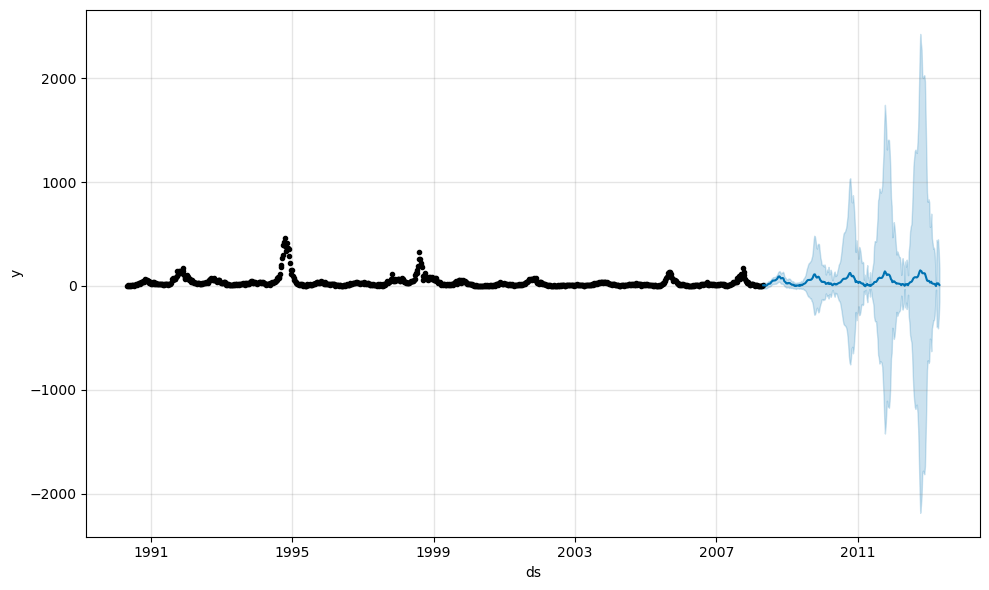

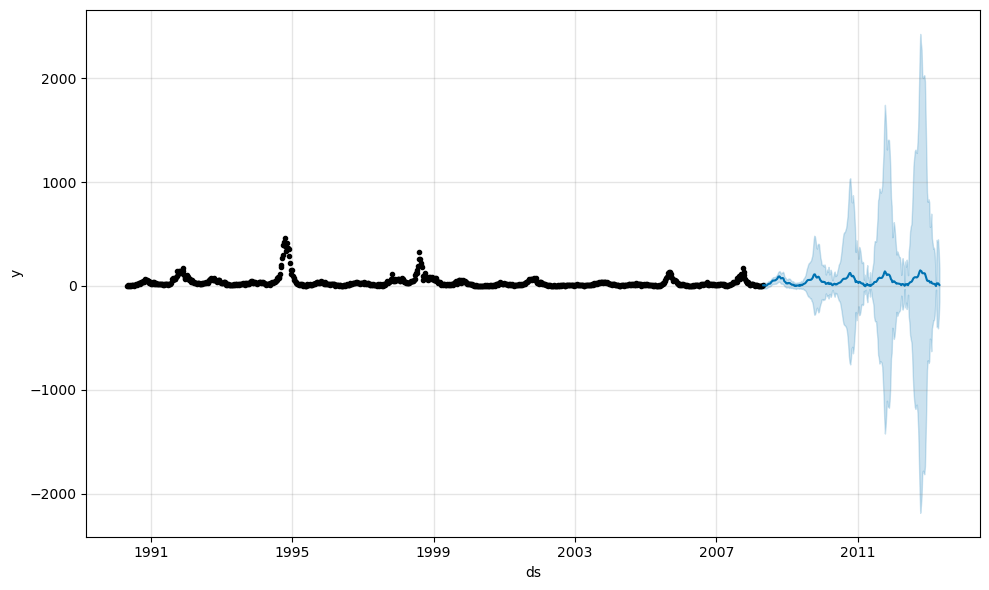

In [34]:
m.plot(forecast_sj)

In [35]:
iq_data = data[data['city'] == 'iq']

In [36]:
iq_data['ndvi_se'] = iq_data['ndvi_se'].fillna(method = 'ffill')
iq_data['ndvi_sw'] = iq_data['ndvi_sw'].fillna(method = 'ffill')
iq_data['ndvi_ne'] = iq_data['ndvi_ne'].fillna(method = 'ffill')
iq_data['ndvi_nw'] = iq_data['ndvi_nw'].fillna(method = 'ffill')

iq_data['reanalysis_air_temp_k'] = iq_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_avg_temp_k'] = iq_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_dew_point_temp_k'] =iq_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_max_air_temp_k'] = iq_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_min_air_temp_k'] = iq_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_specific_humidity_g_per_kg'] = iq_data['reanalysis_specific_humidity_g_per_kg'].fillna(method = 'ffill')
iq_data['station_min_temp_c'] = iq_data['station_min_temp_c'].fillna(method = 'ffill')


iq_data['avg_reanalysis'] = iq_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

iq_data['avg_ndvi'] = iq_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [37]:
iq_data = iq_data[['week_start_date','total_cases','avg_reanalysis','reanalysis_specific_humidity_g_per_kg','avg_ndvi']]

In [38]:
iq_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [39]:
test_df_iq = test_df_main[test_df_main['city']=='iq']
test_df_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
260,iq,2010,26,2010-07-02,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,307.9,293.7,34.11,92.581429,82.29,17.654286,9.428571,27.440,10.760,33.8,21.5,11.2
261,iq,2010,27,2010-07-09,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,299.464286,294.831429,307.7,292.2,9.10,83.885714,25.30,16.320000,10.157143,27.025,9.625,33.0,21.2,8.9
262,iq,2010,28,2010-07-16,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,298.964286,296.417143,306.4,292.5,61.09,92.057143,62.14,18.030000,9.557143,26.950,10.350,33.4,21.6,22.6
263,iq,2010,29,2010-07-23,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,296.642857,293.638571,306.4,289.3,19.60,88.970000,47.80,15.394286,7.828571,26.900,9.700,33.3,14.2,4.8
264,iq,2010,30,2010-07-30,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,300.000000,293.892857,308.1,290.5,18.93,78.610000,56.30,15.468571,11.771429,27.050,11.850,33.5,16.9,3.0


In [40]:
test_df_iq['ndvi_se'] = test_df_iq['ndvi_se'].fillna(method = 'ffill')
test_df_iq['ndvi_sw'] = test_df_iq['ndvi_sw'].fillna(method = 'ffill')
test_df_iq['ndvi_ne'] = test_df_iq['ndvi_ne'].fillna(method = 'ffill')
test_df_iq['ndvi_nw'] = test_df_iq['ndvi_nw'].fillna(method = 'ffill')

test_df_iq['reanalysis_air_temp_k'] = test_df_iq['reanalysis_air_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_avg_temp_k'] = test_df_iq['reanalysis_avg_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_dew_point_temp_k'] =test_df_iq['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_max_air_temp_k'] = test_df_iq['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_min_air_temp_k'] = test_df_iq['reanalysis_min_air_temp_k'].fillna(method = 'ffill')


test_df_iq['avg_reanalysis'] = test_df_iq[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

test_df_iq['avg_ndvi'] = test_df_iq[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [41]:
test_df_iq['reanalysis_specific_humidity_g_per_kg'] = test_df_iq['reanalysis_specific_humidity_g_per_kg'].fillna(method = 'ffill')
test_df_iq['station_min_temp_c'] = test_df_iq['station_min_temp_c'].fillna(method = 'ffill')


In [42]:
test_df_iq = test_df_iq[['week_start_date','avg_reanalysis','reanalysis_specific_humidity_g_per_kg','avg_ndvi']]

In [43]:
test_df_iq.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df_iq.head()

,ds,avg_reanalysis,reanalysis_specific_humidity_g_per_kg,avg_ndvi
260,2010-07-02,298.916286,17.654286,0.175407
261,2010-07-09,298.484000,16.320000,0.303885
262,2010-07-16,298.447429,18.030000,0.260786
263,2010-07-23,296.339429,15.394286,0.089129
264,2010-07-30,298.199143,15.468571,0.287946


In [44]:
# m_iq = Prophet()
# m_iq.add_regressor('avg_reanalysis')
# m_iq.add_regressor('avg_ndvi')
# m_iq.fit(iq_data)

# # # future = m.make_future_dataframe(periods=10)
# # future['avg_reanalysis'] = future['ds'].apply(weather_temp)
# # future['avg_ndvi'] = future['ds'].apply(weather_condition)

# forecast_iq = m_iq.predict(test_df_iq)
# forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

In [45]:
# forecast_iq.head()

In [46]:
# forecast_iq[forecast_iq['yhat'] == 0].count()

In [47]:

# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('reanalysis_specific_humidity_g_per_kg')
    m.add_regressor('avg_ndvi')
    m.fit(iq_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='120 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model.add_regressor('avg_reanalysis')
auto_model.add_regressor('reanalysis_specific_humidity_g_per_kg')
auto_model.add_regressor('avg_ndvi')
auto_model.fit(iq_data)

19:13:44 - cmdstanpy - INFO - Chain [1] start processing
19:13:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:13:52 - cmdstanpy - INFO - Chain [1] start processing
19:13:52 - cmdstanpy - INFO - Chain [1] start processing
19:13:52 - cmdstanpy - INFO - Chain [1] start processing
19:13:52 - cmdstanpy - INFO - Chain [1] start processing
19:13:52 - cmdstanpy - INFO - Chain [1] start processing
19:13:52 - cmdstanpy - INFO - Chain [1] start processing
19:13:53 - cmdstanpy - INFO - Chain [1] start processing
19:13:53 - cmdstanpy - INFO - Chain [1] done processing
19:13:53 - cmdstanpy - INFO - Chain [1] start processing
19:13:53 - cmdstanpy - INFO - Chain [1] done processing
19:13:53 - cmdstanpy - INFO - Chain [1] done processing
19:13:53 - cmdstanpy - INFO - Chain [1] done processing
19:13:53 - cmdstanpy - INFO - Chain [1] done processing
19:13:53 - cmdstanpy - INFO - Chain [1] done pr

19:14:04 - cmdstanpy - INFO - Chain [1] start processing
19:14:05 - cmdstanpy - INFO - Chain [1] done processing
19:14:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:14:05 - cmdstanpy - INFO - Chain [1] start processing
19:14:05 - cmdstanpy - INFO - Chain [1] start processing
19:14:05 - cmdstanpy - INFO - Chain [1] done processing
19:14:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:14:05 - cmdstanpy - INFO - Chain [1] start processing
19:14:05 - cmdstanpy - INFO - Chain [1] done processing
19:14:06 - cmdstanpy - INFO - Chain [1] done processing
19:14:06 - cmdstanpy - INFO - Chain [1] done processing
19:14:06 - cmdstanpy - INFO - Chain [1] done processing
19:14:06 - cmdstanpy - INFO - Chain [1] done processing
19:14:06 - cmdstanpy - INFO - Chain [1] start processing
19:14:06 - cmds

19:14:19 - cmdstanpy - INFO - Chain [1] done processing
19:14:19 - cmdstanpy - INFO - Chain [1] start processing
19:14:19 - cmdstanpy - INFO - Chain [1] done processing
19:14:19 - cmdstanpy - INFO - Chain [1] start processing
19:14:19 - cmdstanpy - INFO - Chain [1] done processing
19:14:20 - cmdstanpy - INFO - Chain [1] start processing
19:14:20 - cmdstanpy - INFO - Chain [1] done processing
19:14:20 - cmdstanpy - INFO - Chain [1] start processing
19:14:20 - cmdstanpy - INFO - Chain [1] done processing
19:14:20 - cmdstanpy - INFO - Chain [1] start processing
19:14:20 - cmdstanpy - INFO - Chain [1] start processing
19:14:20 - cmdstanpy - INFO - Chain [1] done processing
19:14:20 - cmdstanpy - INFO - Chain [1] done processing
19:14:20 - cmdstanpy - INFO - Chain [1] start processing
19:14:20 - cmdstanpy - INFO - Chain [1] done processing
19:14:21 - cmdstanpy - INFO - Chain [1] start processing
19:14:21 - cmdstanpy - INFO - Chain [1] done processing
19:14:21 - cmdstanpy - INFO - Chain [1] 

19:14:48 - cmdstanpy - INFO - Chain [1] start processing
19:14:48 - cmdstanpy - INFO - Chain [1] done processing
19:14:48 - cmdstanpy - INFO - Chain [1] start processing
19:14:49 - cmdstanpy - INFO - Chain [1] done processing
19:14:49 - cmdstanpy - INFO - Chain [1] done processing
19:14:49 - cmdstanpy - INFO - Chain [1] start processing
19:14:50 - cmdstanpy - INFO - Chain [1] start processing
19:14:50 - cmdstanpy - INFO - Chain [1] start processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:52 - cmdstanpy - INFO - Chain [1] start processing
19:14:52 - cmdstanpy - INFO - Chain [1] done processing
19:14:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:14:52 - cmdstanpy - INFO - Chain [1] start processing
19:14:52 - cmdstanpy - INFO - Chain [1] start processin

19:15:05 - cmdstanpy - INFO - Chain [1] done processing
19:15:05 - cmdstanpy - INFO - Chain [1] done processing
19:15:06 - cmdstanpy - INFO - Chain [1] done processing
19:15:06 - cmdstanpy - INFO - Chain [1] start processing
19:15:06 - cmdstanpy - INFO - Chain [1] done processing
19:15:06 - cmdstanpy - INFO - Chain [1] start processing
19:15:06 - cmdstanpy - INFO - Chain [1] done processing
19:15:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:15:06 - cmdstanpy - INFO - Chain [1] start processing
19:15:07 - cmdstanpy - INFO - Chain [1] start processing
19:15:07 - cmdstanpy - INFO - Chain [1] done processing
19:15:07 - cmdstanpy - INFO - Chain [1] done processing
19:15:07 - cmdstanpy - INFO - Chain [1] start processing
19:15:07 - cmdstanpy - INFO - Chain [1] done processing
19:15:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization termin

19:15:23 - cmdstanpy - INFO - Chain [1] start processing
19:15:23 - cmdstanpy - INFO - Chain [1] start processing
19:15:23 - cmdstanpy - INFO - Chain [1] start processing
19:15:23 - cmdstanpy - INFO - Chain [1] done processing
19:15:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:15:23 - cmdstanpy - INFO - Chain [1] done processing
19:15:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:15:23 - cmdstanpy - INFO - Chain [1] done processing
19:15:23 - cmdstanpy - INFO - Chain [1] start processing
19:15:23 - cmdstanpy - INFO - Chain [1] start processing
19:15:23 - cmdstanpy - INFO - Chain [1] start processing
19:15:23 - cmdstanpy - INFO - Chain [1] done processing
19:15:24 - cmdstanpy - INFO - Chain [1] start processing
19:15:24 - cmdstanpy - INFO - Chain [1] done processing
19:15:24 - cm

19:15:55 - cmdstanpy - INFO - Chain [1] done processing
19:15:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:15:55 - cmdstanpy - INFO - Chain [1] start processing
19:15:55 - cmdstanpy - INFO - Chain [1] done processing
19:15:56 - cmdstanpy - INFO - Chain [1] done processing
19:15:56 - cmdstanpy - INFO - Chain [1] start processing
19:15:56 - cmdstanpy - INFO - Chain [1] done processing
19:15:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:15:56 - cmdstanpy - INFO - Chain [1] start processing
19:15:56 - cmdstanpy - INFO - Chain [1] start processing
19:15:56 - cmdstanpy - INFO - Chain [1] done processing
19:15:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:15:56 - cmdstanpy - INFO - 

19:16:08 - cmdstanpy - INFO - Chain [1] start processing
19:16:08 - cmdstanpy - INFO - Chain [1] done processing
19:16:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:16:08 - cmdstanpy - INFO - Chain [1] start processing
19:16:08 - cmdstanpy - INFO - Chain [1] start processing
19:16:08 - cmdstanpy - INFO - Chain [1] done processing
19:16:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:16:08 - cmdstanpy - INFO - Chain [1] start processing
19:16:08 - cmdstanpy - INFO - Chain [1] done processing
19:16:08 - cmdstanpy - INFO - Chain [1] start processing
19:16:08 - cmdstanpy - INFO - Chain [1] done processing
19:16:09 - cmdstanpy - INFO - Chain [1] done processing
19:16:09 - cmdstanpy - INFO - Chain [1] start processing
19:16:09 - cmdstanpy - INFO - Chain [1] done processing
19:16:09 - cmd

19:16:23 - cmdstanpy - INFO - Chain [1] start processing
19:16:23 - cmdstanpy - INFO - Chain [1] done processing
19:16:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:16:23 - cmdstanpy - INFO - Chain [1] start processing
19:16:23 - cmdstanpy - INFO - Chain [1] start processing
19:16:23 - cmdstanpy - INFO - Chain [1] done processing
19:16:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:16:23 - cmdstanpy - INFO - Chain [1] start processing
19:16:23 - cmdstanpy - INFO - Chain [1] start processing
19:16:23 - cmdstanpy - INFO - Chain [1] done processing
19:16:24 - cmdstanpy - INFO - Chain [1] start processing
19:16:24 - cmdstanpy - INFO - Chain [1] done processing
19:16:24 - cmdstanpy - INFO - Chain [1] start processing
19:16:24 - cmdstanpy - INFO - Chain [1] done processing
19:16:24 - cm

19:16:53 - cmdstanpy - INFO - Chain [1] start processing
19:16:53 - cmdstanpy - INFO - Chain [1] done processing
19:16:53 - cmdstanpy - INFO - Chain [1] done processing
19:16:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:16:53 - cmdstanpy - INFO - Chain [1] start processing
19:16:53 - cmdstanpy - INFO - Chain [1] done processing
19:16:53 - cmdstanpy - INFO - Chain [1] done processing
19:16:54 - cmdstanpy - INFO - Chain [1] start processing
19:16:54 - cmdstanpy - INFO - Chain [1] done processing
19:16:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:16:54 - cmdstanpy - INFO - Chain [1] start processing
19:16:54 - cmdstanpy - INFO - Chain [1] done processing
19:16:54 - cmdstanpy - INFO - Chain [1] start processing
19:16:54 - cmdstanpy - INFO - Chain [1] done processing
19:16:54 - cmds

19:17:03 - cmdstanpy - INFO - Chain [1] start processing
19:17:04 - cmdstanpy - INFO - Chain [1] done processing
19:17:04 - cmdstanpy - INFO - Chain [1] done processing
19:17:04 - cmdstanpy - INFO - Chain [1] done processing
19:17:04 - cmdstanpy - INFO - Chain [1] start processing
19:17:04 - cmdstanpy - INFO - Chain [1] done processing
19:17:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:17:04 - cmdstanpy - INFO - Chain [1] start processing
19:17:04 - cmdstanpy - INFO - Chain [1] start processing
19:17:04 - cmdstanpy - INFO - Chain [1] done processing
19:17:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:17:04 - cmdstanpy - INFO - Chain [1] start processing
19:17:04 - cmdstanpy - INFO - Chain [1] start processing
19:17:05 - cmdstanpy - INFO - Chain [1] done processing
19:17:05 - cmd

19:17:16 - cmdstanpy - INFO - Chain [1] start processing
19:17:16 - cmdstanpy - INFO - Chain [1] done processing
19:17:16 - cmdstanpy - INFO - Chain [1] start processing
19:17:16 - cmdstanpy - INFO - Chain [1] done processing
19:17:16 - cmdstanpy - INFO - Chain [1] start processing
19:17:16 - cmdstanpy - INFO - Chain [1] start processing
19:17:16 - cmdstanpy - INFO - Chain [1] done processing
19:17:16 - cmdstanpy - INFO - Chain [1] done processing
19:17:17 - cmdstanpy - INFO - Chain [1] start processing
19:17:17 - cmdstanpy - INFO - Chain [1] done processing
19:17:17 - cmdstanpy - INFO - Chain [1] start processing
19:17:17 - cmdstanpy - INFO - Chain [1] done processing
19:17:17 - cmdstanpy - INFO - Chain [1] start processing
19:17:18 - cmdstanpy - INFO - Chain [1] done processing
19:17:18 - cmdstanpy - INFO - Chain [1] start processing
19:17:18 - cmdstanpy - INFO - Chain [1] done processing
19:17:18 - cmdstanpy - INFO - Chain [1] start processing
19:17:18 - cmdstanpy - INFO - Chain [1]

19:17:44 - cmdstanpy - INFO - Chain [1] start processing
19:17:44 - cmdstanpy - INFO - Chain [1] start processing
19:17:44 - cmdstanpy - INFO - Chain [1] done processing
19:17:44 - cmdstanpy - INFO - Chain [1] done processing
19:17:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:17:44 - cmdstanpy - INFO - Chain [1] done processing
19:17:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
19:17:44 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
19:17:44 - cmdstanpy - INFO - Chain [1] start processing
19:17:45 - cmdstanpy - INFO - Chain [1] start processing
19:17:45 - cmdstanpy - INFO - Chain [1] done processing
19:17:45 - cmdstanpy - INFO - Chain [1] done processing
19:17:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:55 - cmdstanpy - INFO - Chain [1] done processing
19:17:55 - cmdstanpy - INFO - Chain [1] done processing
19:17:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:17:55 - cmdstanpy - INFO - Chain [1] done processing
19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:55 - cmdstanpy - INFO - Chain [1] start processing
19:17:55 - cmdstanpy - INFO - Chain [1] done processing
19:17:56 - cmdstanpy - INFO - Chain [1] start processing
19:17:56 - cmdstanpy - INFO - Chain [1] done processing
19:17:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
19:17:56 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
19:17:56 - cm

19:18:08 - cmdstanpy - INFO - Chain [1] start processing
19:18:08 - cmdstanpy - INFO - Chain [1] done processing
19:18:09 - cmdstanpy - INFO - Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing
19:18:09 - cmdstanpy - INFO - Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing
19:18:09 - cmdstanpy - INFO - Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing
19:18:09 - cmdstanpy - INFO - Chain [1] start processing
19:18:10 - cmdstanpy - INFO - Chain [1] done processing
19:18:11 - cmdstanpy - INFO - Chain [1] start processing
19:18:11 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:18:21 - cmdstanpy - INFO - Chain [1] start processing
19:18:21 - cmdstanpy - INFO - Chain [1] start processing
19:18:22 - cmdstanpy - INFO - Chain [1] start pr

19:18:36 - cmdstanpy - INFO - Chain [1] done processing
19:18:36 - cmdstanpy - INFO - Chain [1] start processing
19:18:36 - cmdstanpy - INFO - Chain [1] start processing
19:18:36 - cmdstanpy - INFO - Chain [1] done processing
19:18:36 - cmdstanpy - INFO - Chain [1] done processing
19:18:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:18:36 - cmdstanpy - INFO - Chain [1] start processing
19:18:36 - cmdstanpy - INFO - Chain [1] done processing
19:18:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:18:36 - cmdstanpy - INFO - Chain [1] start processing
19:18:36 - cmdstanpy - INFO - Chain [1] done processing
19:18:36 - cmdstanpy - INFO - Chain [1] start processing
19:18:36 - cmdstanpy - INFO - Chain [1] done processing
19:18:36 - cmdstanpy - ERROR - Chain [1] error: error during processing

19:18:43 - cmdstanpy - INFO - Chain [1] done processing
19:18:43 - cmdstanpy - INFO - Chain [1] done processing
19:18:43 - cmdstanpy - INFO - Chain [1] done processing
19:18:43 - cmdstanpy - INFO - Chain [1] start processing
19:18:43 - cmdstanpy - INFO - Chain [1] start processing
19:18:43 - cmdstanpy - INFO - Chain [1] start processing
19:18:43 - cmdstanpy - INFO - Chain [1] done processing
19:18:43 - cmdstanpy - INFO - Chain [1] done processing
19:18:43 - cmdstanpy - INFO - Chain [1] done processing
19:18:43 - cmdstanpy - INFO - Chain [1] start processing
19:18:43 - cmdstanpy - INFO - Chain [1] done processing
19:18:43 - cmdstanpy - INFO - Chain [1] done processing
19:18:43 - cmdstanpy - INFO - Chain [1] start processing
19:18:44 - cmdstanpy - INFO - Chain [1] done processing
19:18:44 - cmdstanpy - INFO - Chain [1] start processing
19:18:44 - cmdstanpy - INFO - Chain [1] start processing
19:18:44 - cmdstanpy - INFO - Chain [1] done processing
19:18:44 - cmdstanpy - INFO - Chain [1] d

19:19:09 - cmdstanpy - INFO - Chain [1] done processing
19:19:09 - cmdstanpy - INFO - Chain [1] done processing
19:19:09 - cmdstanpy - INFO - Chain [1] done processing
19:19:10 - cmdstanpy - INFO - Chain [1] done processing
19:19:10 - cmdstanpy - INFO - Chain [1] done processing
19:19:10 - cmdstanpy - INFO - Chain [1] start processing
19:19:10 - cmdstanpy - INFO - Chain [1] start processing
19:19:11 - cmdstanpy - INFO - Chain [1] done processing
19:19:11 - cmdstanpy - INFO - Chain [1] start processing
19:19:11 - cmdstanpy - INFO - Chain [1] start processing
19:19:11 - cmdstanpy - INFO - Chain [1] start processing
19:19:11 - cmdstanpy - INFO - Chain [1] done processing
19:19:11 - cmdstanpy - INFO - Chain [1] start processing
19:19:11 - cmdstanpy - INFO - Chain [1] done processing
19:19:12 - cmdstanpy - INFO - Chain [1] done processing
19:19:12 - cmdstanpy - INFO - Chain [1] start processing
19:19:12 - cmdstanpy - INFO - Chain [1] start processing
19:19:12 - cmdstanpy - INFO - Chain [1] 

19:19:24 - cmdstanpy - INFO - Chain [1] start processing
19:19:24 - cmdstanpy - INFO - Chain [1] done processing
19:19:24 - cmdstanpy - INFO - Chain [1] start processing
19:19:24 - cmdstanpy - INFO - Chain [1] done processing
19:19:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:19:24 - cmdstanpy - INFO - Chain [1] start processing
19:19:24 - cmdstanpy - INFO - Chain [1] start processing
19:19:24 - cmdstanpy - INFO - Chain [1] done processing
19:19:25 - cmdstanpy - INFO - Chain [1] start processing
19:19:25 - cmdstanpy - INFO - Chain [1] done processing
19:19:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:19:25 - cmdstanpy - INFO - Chain [1] start processing
19:19:26 - cmdstanpy - INFO - Chain [1] done processing
19:19:26 - cmdstanpy - INFO - Chain [1] start processing
19:19:26 - cm

19:19:39 - cmdstanpy - INFO - Chain [1] done processing
19:19:39 - cmdstanpy - INFO - Chain [1] done processing
19:19:40 - cmdstanpy - INFO - Chain [1] start processing
19:19:40 - cmdstanpy - INFO - Chain [1] start processing
19:19:40 - cmdstanpy - INFO - Chain [1] done processing
19:19:40 - cmdstanpy - INFO - Chain [1] done processing
19:19:40 - cmdstanpy - INFO - Chain [1] start processing
19:19:40 - cmdstanpy - INFO - Chain [1] start processing
19:19:40 - cmdstanpy - INFO - Chain [1] done processing
19:19:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
19:19:40 - cmdstanpy - INFO - Chain [1] start processing
Optimization terminated abnormally. Falling back to Newton.
19:19:40 - cmdstanpy - INFO - Chain [1] done processing
19:19:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:19:40 - cmdstanpy - INFO - Chain [1] start processing
19:19:40 - cmd

19:21:11 - cmdstanpy - INFO - Chain [1] start processing
19:21:11 - cmdstanpy - INFO - Chain [1] done processing
19:21:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:21:11 - cmdstanpy - INFO - Chain [1] start processing
19:21:12 - cmdstanpy - INFO - Chain [1] done processing
19:21:12 - cmdstanpy - INFO - Chain [1] done processing
19:21:12 - cmdstanpy - INFO - Chain [1] done processing
19:21:13 - cmdstanpy - INFO - Chain [1] done processing
19:21:13 - cmdstanpy - INFO - Chain [1] start processing
19:21:13 - cmdstanpy - INFO - Chain [1] done processing
19:21:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:21:13 - cmdstanpy - INFO - Chain [1] start processing
19:21:13 - cmdstanpy - INFO - Chain [1] start processing
19:21:13 - cmdstanpy - INFO - Chain [1] start processing
19:21:13 - cmd

19:21:26 - cmdstanpy - INFO - Chain [1] start processing
19:21:26 - cmdstanpy - INFO - Chain [1] done processing
19:21:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:21:26 - cmdstanpy - INFO - Chain [1] start processing
19:21:27 - cmdstanpy - INFO - Chain [1] start processing
19:21:27 - cmdstanpy - INFO - Chain [1] start processing
19:21:27 - cmdstanpy - INFO - Chain [1] done processing
19:21:27 - cmdstanpy - INFO - Chain [1] done processing
19:21:28 - cmdstanpy - INFO - Chain [1] start processing
19:21:28 - cmdstanpy - INFO - Chain [1] done processing
19:21:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:21:28 - cmdstanpy - INFO - Chain [1] start processing
19:21:28 - cmdstanpy - INFO - Chain [1] start processing
19:21:29 - cmdstanpy - INFO - Chain [1] done processing
19:21:29 - cm

19:21:50 - cmdstanpy - INFO - Chain [1] start processing
19:21:50 - cmdstanpy - INFO - Chain [1] done processing
19:21:50 - cmdstanpy - INFO - Chain [1] done processing
19:21:51 - cmdstanpy - INFO - Chain [1] start processing
19:21:51 - cmdstanpy - INFO - Chain [1] done processing
19:21:51 - cmdstanpy - INFO - Chain [1] start processing
19:21:51 - cmdstanpy - INFO - Chain [1] done processing
19:21:51 - cmdstanpy - INFO - Chain [1] start processing
19:21:51 - cmdstanpy - INFO - Chain [1] done processing
19:21:51 - cmdstanpy - INFO - Chain [1] start processing
19:21:51 - cmdstanpy - INFO - Chain [1] done processing
19:21:52 - cmdstanpy - INFO - Chain [1] start processing
19:21:52 - cmdstanpy - INFO - Chain [1] done processing
19:21:53 - cmdstanpy - INFO - Chain [1] done processing
19:21:53 - cmdstanpy - INFO - Chain [1] start processing
19:21:53 - cmdstanpy - INFO - Chain [1] done processing
19:21:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Opt

19:22:24 - cmdstanpy - INFO - Chain [1] start processing
19:22:24 - cmdstanpy - INFO - Chain [1] start processing
19:22:24 - cmdstanpy - INFO - Chain [1] done processing
19:22:24 - cmdstanpy - INFO - Chain [1] done processing
19:22:25 - cmdstanpy - INFO - Chain [1] start processing
19:22:25 - cmdstanpy - INFO - Chain [1] done processing
19:22:25 - cmdstanpy - INFO - Chain [1] start processing
19:22:25 - cmdstanpy - INFO - Chain [1] start processing
19:22:25 - cmdstanpy - INFO - Chain [1] start processing
19:22:25 - cmdstanpy - INFO - Chain [1] done processing
19:22:25 - cmdstanpy - INFO - Chain [1] done processing
19:22:25 - cmdstanpy - INFO - Chain [1] done processing
19:22:25 - cmdstanpy - INFO - Chain [1] start processing
19:22:25 - cmdstanpy - INFO - Chain [1] done processing
19:22:26 - cmdstanpy - INFO - Chain [1] start processing
19:22:26 - cmdstanpy - INFO - Chain [1] start processing
19:22:26 - cmdstanpy - INFO - Chain [1] done processing
19:22:28 - cmdstanpy - INFO - Chain [1]

19:22:43 - cmdstanpy - INFO - Chain [1] done processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] done processing
19:22:44 - cmdstanpy - INFO - Chain [1] done processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] done processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] done processing
19:22:44 - cmdstanpy - INFO - Chain [1] done processing
19:22:44 - cmdstanpy - INFO - Chain [1] done processing
19:22:44 - cmdstanpy - INFO - Chain [1] start processing
19:22:44 - cmdstanpy - INFO - Chain [1] done processing
19:22:45 - cmdstanpy - INFO - Chain [1] done processing
19:22:47 - cmdstanpy - INFO - Chain [1] 

19:23:19 - cmdstanpy - INFO - Chain [1] done processing
19:23:19 - cmdstanpy - INFO - Chain [1] done processing
19:23:27 - cmdstanpy - INFO - Chain [1] start processing
19:23:28 - cmdstanpy - INFO - Chain [1] start processing
19:23:28 - cmdstanpy - INFO - Chain [1] start processing
19:23:29 - cmdstanpy - INFO - Chain [1] start processing
19:23:29 - cmdstanpy - INFO - Chain [1] start processing
19:23:29 - cmdstanpy - INFO - Chain [1] start processing
19:23:30 - cmdstanpy - INFO - Chain [1] start processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing
19:23:30 - cmdstanpy - INFO - Chain [1] start processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing
19:23:30 - cmdstanpy - INFO - Chain [1] done processing
19:23:31 - cmdstanpy - INFO - Chain [1] 

19:24:11 - cmdstanpy - INFO - Chain [1] start processing
19:24:11 - cmdstanpy - INFO - Chain [1] done processing
19:24:11 - cmdstanpy - INFO - Chain [1] done processing
19:24:11 - cmdstanpy - INFO - Chain [1] done processing
19:24:11 - cmdstanpy - INFO - Chain [1] done processing
19:24:11 - cmdstanpy - INFO - Chain [1] start processing
19:24:12 - cmdstanpy - INFO - Chain [1] start processing
19:24:12 - cmdstanpy - INFO - Chain [1] done processing
19:24:12 - cmdstanpy - INFO - Chain [1] done processing
19:24:12 - cmdstanpy - INFO - Chain [1] start processing
19:24:13 - cmdstanpy - INFO - Chain [1] done processing
19:24:13 - cmdstanpy - INFO - Chain [1] start processing
19:24:13 - cmdstanpy - INFO - Chain [1] done processing
19:24:13 - cmdstanpy - INFO - Chain [1] start processing
19:24:13 - cmdstanpy - INFO - Chain [1] start processing
19:24:13 - cmdstanpy - INFO - Chain [1] done processing
19:24:13 - cmdstanpy - INFO - Chain [1] done processing
19:24:13 - cmdstanpy - INFO - Chain [1] s

19:24:28 - cmdstanpy - INFO - Chain [1] done processing
19:24:29 - cmdstanpy - INFO - Chain [1] start processing
19:24:29 - cmdstanpy - INFO - Chain [1] done processing
19:24:29 - cmdstanpy - INFO - Chain [1] start processing
19:24:29 - cmdstanpy - INFO - Chain [1] done processing
19:24:29 - cmdstanpy - INFO - Chain [1] start processing
19:24:29 - cmdstanpy - INFO - Chain [1] done processing
19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing
19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing
19:24:30 - cmdstanpy - INFO - Chain [1] done processing
19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1] start processing
19:24:30 - cmdstanpy - INFO - Chain [1]

19:25:02 - cmdstanpy - INFO - Chain [1] start processing
19:25:02 - cmdstanpy - INFO - Chain [1] done processing
19:25:03 - cmdstanpy - INFO - Chain [1] start processing
19:25:03 - cmdstanpy - INFO - Chain [1] start processing
19:25:03 - cmdstanpy - INFO - Chain [1] start processing
19:25:03 - cmdstanpy - INFO - Chain [1] done processing
19:25:03 - cmdstanpy - INFO - Chain [1] done processing
19:25:03 - cmdstanpy - INFO - Chain [1] done processing
19:25:03 - cmdstanpy - INFO - Chain [1] start processing
19:25:03 - cmdstanpy - INFO - Chain [1] done processing
19:25:03 - cmdstanpy - INFO - Chain [1] start processing
19:25:03 - cmdstanpy - INFO - Chain [1] start processing
19:25:04 - cmdstanpy - INFO - Chain [1] start processing
19:25:04 - cmdstanpy - INFO - Chain [1] done processing
19:25:04 - cmdstanpy - INFO - Chain [1] done processing
19:25:04 - cmdstanpy - INFO - Chain [1] done processing
19:25:04 - cmdstanpy - INFO - Chain [1] start processing
19:25:04 - cmdstanpy - INFO - Chain [1]

19:25:28 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] done processing
19:25:29 - cmdstanpy - INFO - Chain [1] done processing
19:25:30 - cmdstanpy - INFO - Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1] done processing
19:25:30 - cmdstanpy - INFO - Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1] start processing
19:25:30 - cmdstanpy - INFO - Chain [1]

19:25:45 - cmdstanpy - INFO - Chain [1] done processing
19:25:45 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing
19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing
19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing
19:25:46 - cmdstanpy - INFO - Chain [1] start processing
19:25:46 - cmdstanpy - INFO - Chain [1] done processing
19:25:47 - cmdstanpy - INFO - Chain [1] start processing
19:25:47 - cmdstanpy - INFO - Chain [1] done processing
19:25:47 - cmdstanpy - INFO - Chain [1] 

19:26:21 - cmdstanpy - INFO - Chain [1] done processing
19:26:21 - cmdstanpy - INFO - Chain [1] done processing
19:26:21 - cmdstanpy - INFO - Chain [1] start processing
19:26:21 - cmdstanpy - INFO - Chain [1] start processing
19:26:21 - cmdstanpy - INFO - Chain [1] done processing
19:26:21 - cmdstanpy - INFO - Chain [1] start processing
19:26:21 - cmdstanpy - INFO - Chain [1] done processing
19:26:21 - cmdstanpy - INFO - Chain [1] done processing
19:26:21 - cmdstanpy - INFO - Chain [1] done processing
19:26:21 - cmdstanpy - INFO - Chain [1] done processing
19:26:21 - cmdstanpy - INFO - Chain [1] done processing
19:26:22 - cmdstanpy - INFO - Chain [1] start processing
19:26:23 - cmdstanpy - INFO - Chain [1] start processing
19:26:23 - cmdstanpy - INFO - Chain [1] start processing
19:26:23 - cmdstanpy - INFO - Chain [1] start processing
19:26:23 - cmdstanpy - INFO - Chain [1] done processing
19:26:23 - cmdstanpy - INFO - Chain [1] start processing
19:26:23 - cmdstanpy - INFO - Chain [1] 

19:26:39 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing
19:26:39 - cmdstanpy - INFO - Chain [1] done processing
19:26:40 - cmdstanpy - INFO - Chain [1] start processing
19:26:40 - cmdstanpy - INFO - Chain [1] start processing
19:26:40 - cmdstanpy - INFO - Chain [1] start processing
19:26:40 - cmdstanpy - INFO - Chain [1] start processing
19:26:41 - cmdstanpy - INFO - Chain [1] start processing
19:26:41 - cmdstanpy - INFO - Chain [1] done processing
19:26:41 - cmdstanpy - INFO - Chain [1] start processing
19:26:41 - cmdstanpy - INFO - Chain [1] done processing
19:26:41 - cmdstanpy - INFO - Chain [1] done processing
19:26:41 - cmdstanpy - INFO - Chain [1] do

19:27:12 - cmdstanpy - INFO - Chain [1] done processing
19:27:12 - cmdstanpy - INFO - Chain [1] start processing
19:27:12 - cmdstanpy - INFO - Chain [1] start processing
19:27:12 - cmdstanpy - INFO - Chain [1] done processing
19:27:12 - cmdstanpy - INFO - Chain [1] done processing
19:27:13 - cmdstanpy - INFO - Chain [1] start processing
19:27:13 - cmdstanpy - INFO - Chain [1] start processing
19:27:13 - cmdstanpy - INFO - Chain [1] start processing
19:27:13 - cmdstanpy - INFO - Chain [1] done processing
19:27:13 - cmdstanpy - INFO - Chain [1] done processing
19:27:13 - cmdstanpy - INFO - Chain [1] start processing
19:27:13 - cmdstanpy - INFO - Chain [1] done processing
19:27:14 - cmdstanpy - INFO - Chain [1] done processing
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1] done processing
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1]

19:27:59 - cmdstanpy - INFO - Chain [1] done processing
19:27:59 - cmdstanpy - INFO - Chain [1] done processing
19:27:59 - cmdstanpy - INFO - Chain [1] start processing
19:27:59 - cmdstanpy - INFO - Chain [1] start processing
19:28:00 - cmdstanpy - INFO - Chain [1] start processing
19:28:00 - cmdstanpy - INFO - Chain [1] done processing
19:28:00 - cmdstanpy - INFO - Chain [1] start processing
19:28:00 - cmdstanpy - INFO - Chain [1] done processing
19:28:02 - cmdstanpy - INFO - Chain [1] start processing
19:28:02 - cmdstanpy - INFO - Chain [1] done processing
19:28:02 - cmdstanpy - INFO - Chain [1] done processing
19:28:02 - cmdstanpy - INFO - Chain [1] start processing
19:28:02 - cmdstanpy - INFO - Chain [1] done processing
19:28:02 - cmdstanpy - INFO - Chain [1] done processing
19:28:03 - cmdstanpy - INFO - Chain [1] start processing
19:28:04 - cmdstanpy - INFO - Chain [1] done processing
19:28:04 - cmdstanpy - INFO - Chain [1] start processing
19:28:04 - cmdstanpy - INFO - Chain [1] 

19:28:25 - cmdstanpy - INFO - Chain [1] done processing
19:28:25 - cmdstanpy - INFO - Chain [1] done processing
19:28:26 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing
19:28:27 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing
19:28:27 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:29 - cmdstanpy - INFO - Chain [1] start processing
19:28:30 - cmdstanpy - INFO - Chain [1] 

19:29:24 - cmdstanpy - INFO - Chain [1] start processing
19:29:24 - cmdstanpy - INFO - Chain [1] start processing
19:29:24 - cmdstanpy - INFO - Chain [1] done processing
19:29:24 - cmdstanpy - INFO - Chain [1] done processing
19:29:25 - cmdstanpy - INFO - Chain [1] start processing
19:29:26 - cmdstanpy - INFO - Chain [1] done processing
19:29:26 - cmdstanpy - INFO - Chain [1] start processing
19:29:27 - cmdstanpy - INFO - Chain [1] start processing
19:29:27 - cmdstanpy - INFO - Chain [1] done processing
19:29:27 - cmdstanpy - INFO - Chain [1] start processing
19:29:27 - cmdstanpy - INFO - Chain [1] start processing
19:29:27 - cmdstanpy - INFO - Chain [1] start processing
19:29:28 - cmdstanpy - INFO - Chain [1] done processing
19:29:28 - cmdstanpy - INFO - Chain [1] done processing
19:29:28 - cmdstanpy - INFO - Chain [1] start processing
19:29:28 - cmdstanpy - INFO - Chain [1] done processing
19:29:28 - cmdstanpy - INFO - Chain [1] start processing
19:29:28 - cmdstanpy - INFO - Chain [1

19:29:51 - cmdstanpy - INFO - Chain [1] done processing
19:29:51 - cmdstanpy - INFO - Chain [1] done processing
19:29:52 - cmdstanpy - INFO - Chain [1] done processing
19:29:52 - cmdstanpy - INFO - Chain [1] done processing
19:29:57 - cmdstanpy - INFO - Chain [1] start processing
19:29:58 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:30:12 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] start processing
19:30:13 - cmdstanpy - INFO - Chain [1] start processing
19:30:14 - cmdstanpy - INFO - Chain [1] done processing
19:30:14 - cmdstanpy - INFO - Chain [1] done pr

19:30:35 - cmdstanpy - INFO - Chain [1] start processing
19:30:35 - cmdstanpy - INFO - Chain [1] done processing
19:30:35 - cmdstanpy - INFO - Chain [1] start processing
19:30:35 - cmdstanpy - INFO - Chain [1] done processing
19:30:36 - cmdstanpy - INFO - Chain [1] done processing
19:30:36 - cmdstanpy - INFO - Chain [1] done processing
19:30:36 - cmdstanpy - INFO - Chain [1] start processing
19:30:36 - cmdstanpy - INFO - Chain [1] start processing
19:30:36 - cmdstanpy - INFO - Chain [1] start processing
19:30:36 - cmdstanpy - INFO - Chain [1] start processing
19:30:36 - cmdstanpy - INFO - Chain [1] done processing
19:30:37 - cmdstanpy - INFO - Chain [1] done processing
19:30:37 - cmdstanpy - INFO - Chain [1] done processing
19:30:37 - cmdstanpy - INFO - Chain [1] done processing
19:30:37 - cmdstanpy - INFO - Chain [1] start processing
19:30:37 - cmdstanpy - INFO - Chain [1] start processing
19:30:37 - cmdstanpy - INFO - Chain [1] start processing
19:30:38 - cmdstanpy - INFO - Chain [1]

19:31:15 - cmdstanpy - INFO - Chain [1] start processing
19:31:15 - cmdstanpy - INFO - Chain [1] done processing
19:31:16 - cmdstanpy - INFO - Chain [1] done processing
19:31:16 - cmdstanpy - INFO - Chain [1] done processing
19:31:16 - cmdstanpy - INFO - Chain [1] done processing
19:31:16 - cmdstanpy - INFO - Chain [1] start processing
19:31:16 - cmdstanpy - INFO - Chain [1] done processing
19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:17 - cmdstanpy - INFO - Chain [1] done processing
19:31:17 - cmdstanpy - INFO - Chain [1] done processing
19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:17 - cmdstanpy - INFO - Chain [1] done processing
19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:17 - cmdstanpy - INFO - Chain [1] done processing
19:31:17 - cmdstanpy - INFO - Chain [1] start processing
19:31:18 - cmdstanpy - INFO - Chain [1] done processing
19:31:18 - cmdstanpy - INFO - Chain [1] s

19:31:36 - cmdstanpy - INFO - Chain [1] start processing
19:31:36 - cmdstanpy - INFO - Chain [1] done processing
19:31:36 - cmdstanpy - INFO - Chain [1] done processing
19:31:37 - cmdstanpy - INFO - Chain [1] start processing
19:31:37 - cmdstanpy - INFO - Chain [1] done processing
19:31:37 - cmdstanpy - INFO - Chain [1] start processing
19:31:37 - cmdstanpy - INFO - Chain [1] start processing
19:31:37 - cmdstanpy - INFO - Chain [1] done processing
19:31:37 - cmdstanpy - INFO - Chain [1] done processing
19:31:37 - cmdstanpy - INFO - Chain [1] done processing
19:31:38 - cmdstanpy - INFO - Chain [1] start processing
19:31:38 - cmdstanpy - INFO - Chain [1] start processing
19:31:38 - cmdstanpy - INFO - Chain [1] start processing
19:31:38 - cmdstanpy - INFO - Chain [1] done processing
19:31:38 - cmdstanpy - INFO - Chain [1] start processing
19:31:38 - cmdstanpy - INFO - Chain [1] done processing
19:31:38 - cmdstanpy - INFO - Chain [1] done processing
19:31:38 - cmdstanpy - INFO - Chain [1] 

19:32:18 - cmdstanpy - INFO - Chain [1] done processing
19:32:19 - cmdstanpy - INFO - Chain [1] start processing
19:32:19 - cmdstanpy - INFO - Chain [1] start processing
19:32:20 - cmdstanpy - INFO - Chain [1] done processing
19:32:20 - cmdstanpy - INFO - Chain [1] done processing
19:32:20 - cmdstanpy - INFO - Chain [1] start processing
19:32:21 - cmdstanpy - INFO - Chain [1] start processing
19:32:21 - cmdstanpy - INFO - Chain [1] start processing
19:32:21 - cmdstanpy - INFO - Chain [1] done processing
19:32:22 - cmdstanpy - INFO - Chain [1] done processing
19:32:22 - cmdstanpy - INFO - Chain [1] done processing
19:32:22 - cmdstanpy - INFO - Chain [1] start processing
19:32:22 - cmdstanpy - INFO - Chain [1] start processing
19:32:22 - cmdstanpy - INFO - Chain [1] done processing
19:32:22 - cmdstanpy - INFO - Chain [1] done processing
19:32:23 - cmdstanpy - INFO - Chain [1] start processing
19:32:23 - cmdstanpy - INFO - Chain [1] start processing
19:32:23 - cmdstanpy - INFO - Chain [1]

19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing
19:33:49 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing
19:33:50 - cmdstanpy - INFO - Chain [1] done processing
19:33:50 - cmdstanpy - INFO - Chain [1] start processing
19:33:50 - cmdstanpy - INFO - Chain [1] start processing
19:33:51 - cmdstanpy - INFO - Chain [1

19:34:12 - cmdstanpy - INFO - Chain [1] done processing
19:34:13 - cmdstanpy - INFO - Chain [1] done processing
19:34:13 - cmdstanpy - INFO - Chain [1] start processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing
19:34:14 - cmdstanpy - INFO - Chain [1] done processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing
19:34:14 - cmdstanpy - INFO - Chain [1] done processing
19:34:14 - cmdstanpy - INFO - Chain [1] start processing
19:34:14 - cmdstanpy - INFO - Chain [1] done processing
19:34:15 - cmdstanpy - INFO - Chain [1] start processing
19:34:15 - cmdstanpy - INFO - Chain [1] start processing
19:34:15 - cmdstanpy - INFO - Chain [1] done processing
19:34:15 - cmdstanpy - INFO - Chain [1] done processing
19:34:15 - cmdstanpy - INFO - Chain [1] done processing
19:34:15 - cmdstanpy - INFO - Chain [1] done processing
19:34:15 - cmdstanpy - INFO - Chain [1] 

19:35:36 - cmdstanpy - INFO - Chain [1] start processing
19:35:36 - cmdstanpy - INFO - Chain [1] done processing
19:35:37 - cmdstanpy - INFO - Chain [1] start processing
19:35:37 - cmdstanpy - INFO - Chain [1] done processing
19:35:38 - cmdstanpy - INFO - Chain [1] start processing
19:35:38 - cmdstanpy - INFO - Chain [1] start processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:39 - cmdstanpy - INFO - Chain [1] done processing
19:35:40 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:41 - cmdstanpy - INFO - Chain [1] start processing
19:35:41 - cmdstanpy - INFO - Chain [1] done processing
19:35:42 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] start processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:43 - cmdstanpy - INFO - Chain [1] done processing
19:35:44 - cmdstanpy - INFO - Chain [1] start processing
19:35:45 - cmdstanpy - INFO - Chain [1]

19:36:38 - cmdstanpy - INFO - Chain [1] done processing
19:36:38 - cmdstanpy - INFO - Chain [1] done processing
19:36:39 - cmdstanpy - INFO - Chain [1] done processing
19:36:39 - cmdstanpy - INFO - Chain [1] start processing
19:36:39 - cmdstanpy - INFO - Chain [1] start processing
19:36:39 - cmdstanpy - INFO - Chain [1] start processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:40 - cmdstanpy - INFO - Chain [1] done processing
19:36:40 - cmdstanpy - INFO - Chain [1] start processing
19:36:41 - cmdstanpy - INFO - Chain [1] done processing
19:36:42 - cmdstanpy - INFO - Chain [1] start processing
19:36:42 - cmdstanpy - INFO - Chain [1] start processing
19:36:42 - cmdstanpy - INFO - Chain [1] done processing
19:36:43 - cmdstanpy - INFO - Chain [1] done processing
19:37:04 - cmdstanpy - INFO - Chain [1] done processing
19:37:08 - cmdstanpy - INFO - Chain [1] done processing
19:37:10 - cmdstanpy - INFO - Chain [1] do

19:37:47 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] done processing
19:37:48 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] start processing
19:37:49 - cmdstanpy - INFO - Chain [1] done processing
19:37:50 - cmdstanpy - INFO - Chain [1] 

19:38:34 - cmdstanpy - INFO - Chain [1] done processing
19:38:34 - cmdstanpy - INFO - Chain [1] start processing
19:38:34 - cmdstanpy - INFO - Chain [1] done processing
19:38:35 - cmdstanpy - INFO - Chain [1] start processing
19:38:35 - cmdstanpy - INFO - Chain [1] done processing
19:38:36 - cmdstanpy - INFO - Chain [1] start processing
19:38:36 - cmdstanpy - INFO - Chain [1] done processing
19:38:37 - cmdstanpy - INFO - Chain [1] start processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
19:38:37 - cmdstanpy - INFO - Chain [1] start processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
19:38:38 - cmdstanpy - INFO - Chain [1] start processing
19:38:38 - cmdstanpy - INFO - Chain [1] done processing
19:38:38 - cmdstanpy - INFO - Chain [1] start processing
19:38:38 - cmdstanpy - INFO - Chain [1] done processing
19:38:39 - cmdstanpy - INFO - Chain [1] start processing
19:38:39 - cmdstanpy - INFO - Chain [1] 

19:39:20 - cmdstanpy - INFO - Chain [1] done processing
19:39:20 - cmdstanpy - INFO - Chain [1] done processing
19:39:20 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing
19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1]

In [48]:
forecast_iq = auto_model.predict(test_df_iq)
forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
141,2013-03-19,3.814015,-8.203076,16.059564
142,2013-03-26,3.423594,-7.982169,16.156756
143,2013-04-02,3.583740,-8.632763,15.813254
144,2013-04-09,2.537919,-9.987944,14.692829
145,2013-04-16,1.825019,-10.835020,14.303300
146,2013-04-23,2.530012,-10.539750,14.807059
147,2013-04-30,-0.271334,-12.712792,11.589611
148,2013-05-07,1.916140,-11.007415,14.237299
149,2013-05-14,2.331267,-10.079359,14.853006
150,2013-05-21,1.483100,-10.881398,13.915062


In [50]:
forecast_sj.to_csv('forecast_sj_three_feat_120.csv')
forecast_iq.to_csv('forecast_iq_three_feat_120.csv')

In [14]:
# sj_data.info()